In [1]:
# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from pandas import DataFrame
from pandas import concat
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
data = pd.read_csv("Google_Stock_Price_Train.csv")
data_test = pd.read_csv("Google_Stock_Price_Test.csv")


In [3]:
data_Open = data.loc[:,["Open"]].values
data_test_Open = data_test.loc[:,["Open"]].values

In [4]:

train = data_Open[:len(data)-200] 
valid = data_Open[len(train):] 

In [5]:
train = train.reshape(train.shape[0],1)
valid = valid.reshape(valid.shape[0],1)
test = data_test_Open.reshape(data_test_Open.shape[0],1)

In [6]:
scaler = MinMaxScaler(feature_range= (0,1)) # defining of Scaler
train_scaled = scaler.fit_transform(train) # applying to Scaler to train
test_scaled = scaler.transform(test)
valid_scaled = scaler.transform(valid)

In [7]:
# We add first 50 locution to "X_train" and we 51. locution to "y_train" .
X_valid = []
y_valid = []
# n_steps = 60
# n_seq = 2
timesteps = 120
#n_input = n_steps * n_seq
for i in range(timesteps, valid_scaled.shape[0]):
    X_valid.append(valid_scaled[i-timesteps:i,0])
    y_valid.append(valid_scaled[i,0])

X_valid, y_valid = np.array(X_valid), np.array(y_valid)


# Reshaping
X_valid = X_valid.reshape(X_valid.shape[0], X_valid.shape[1], 1)  # Dimension of array is 3.






In [8]:
X_train = []
y_train = []
#timesteps = 50

for i in range(timesteps, train_scaled.shape[0]):
    X_train.append(train_scaled[i-timesteps:i,0])
    y_train.append(train_scaled[i,0])

X_train, y_train = np.array(X_train), np.array(y_train)


# Reshaping
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)  # Dimension of array is 3.

In [9]:
dataset_total = pd.concat((data['Open'], data_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(data_test) - timesteps:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)
X_test = []
for i in range(timesteps, inputs.shape[0]):
    X_test.append(inputs[i-timesteps:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [11]:
# Importing the Keras libraries and packages

from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout 
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D

In [27]:
# --- RNN ---


# Initialising the RNN
model = Sequential()

# Adding the first RNN layer and some Dropout regularisation
model.add(SimpleRNN(units = 80,activation='tanh', return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.25)) 

# Adding a second RNN layer and some Dropout regularisation.
model.add(SimpleRNN(units = 80,activation='tanh', return_sequences = True))
model.add(Dropout(0.25))

# Adding a third RNN layer and some Dropout regularisation. 
model.add(SimpleRNN(units = 80,activation='tanh', return_sequences = True))
model.add(Dropout(0.25))

# Adding a fourth RNN layer and some Dropout regularisation.
model.add(SimpleRNN(units = 80))
model.add(Dropout(0.4))


# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')




In [28]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
es = EarlyStopping(monitor= 'val_loss', mode='min', patience=200)
modelsave = ModelCheckpoint("RNN_best.h5", monitor= 'val_loss', verbose=1, save_best_only=True,
                             save_weights_only=False, mode='min')

In [29]:
# Fitting the RNN to the Training set
History =model.fit(X_train, y_train, epochs = 2000, batch_size = 512
                       ,validation_data=(X_valid, y_valid), callbacks=[es,modelsave])

Epoch 1/2000
2/2 [==============================] - ETA: 0s - loss: 1.4459
Epoch 00001: val_loss improved from inf to 0.00390, saving model to RNN_best.h5
2/2 [==============================] - 0s 223ms/step - loss: 1.4459 - val_loss: 0.0039
Epoch 2/2000
2/2 [==============================] - ETA: 0s - loss: 0.9448
Epoch 00002: val_loss did not improve from 0.00390
2/2 [==============================] - 0s 79ms/step - loss: 0.9448 - val_loss: 0.3432
Epoch 3/2000
2/2 [==============================] - ETA: 0s - loss: 0.9541
Epoch 00003: val_loss improved from 0.00390 to 0.00096, saving model to RNN_best.h5
2/2 [==============================] - 0s 85ms/step - loss: 0.9541 - val_loss: 9.5756e-04
Epoch 4/2000
2/2 [==============================] - ETA: 0s - loss: 0.9519
Epoch 00004: val_loss did not improve from 0.00096
2/2 [==============================] - 0s 107ms/step - loss: 0.9519 - val_loss: 0.0028
Epoch 5/2000
2/2 [==============================] - ETA: 0s - loss: 0.8136
Epoch 000

2/2 [==============================] - ETA: 0s - loss: 0.2403
Epoch 00039: val_loss did not improve from 0.00096
2/2 [==============================] - 0s 80ms/step - loss: 0.2403 - val_loss: 0.0591
Epoch 40/2000
2/2 [==============================] - ETA: 0s - loss: 0.2448
Epoch 00040: val_loss did not improve from 0.00096
2/2 [==============================] - 0s 86ms/step - loss: 0.2448 - val_loss: 0.0351
Epoch 41/2000
2/2 [==============================] - ETA: 0s - loss: 0.2319
Epoch 00041: val_loss did not improve from 0.00096
2/2 [==============================] - 0s 89ms/step - loss: 0.2319 - val_loss: 0.0181
Epoch 42/2000
2/2 [==============================] - ETA: 0s - loss: 0.2214
Epoch 00042: val_loss did not improve from 0.00096
2/2 [==============================] - 0s 82ms/step - loss: 0.2214 - val_loss: 0.0113
Epoch 43/2000
2/2 [==============================] - ETA: 0s - loss: 0.2374
Epoch 00043: val_loss did not improve from 0.00096
2/2 [==============================

Epoch 78/2000
2/2 [==============================] - ETA: 0s - loss: 0.0933
Epoch 00078: val_loss did not improve from 0.00096
2/2 [==============================] - 0s 85ms/step - loss: 0.0933 - val_loss: 0.0084
Epoch 79/2000
2/2 [==============================] - ETA: 0s - loss: 0.0955
Epoch 00079: val_loss did not improve from 0.00096
2/2 [==============================] - 0s 78ms/step - loss: 0.0955 - val_loss: 0.0054
Epoch 80/2000
2/2 [==============================] - ETA: 0s - loss: 0.0960
Epoch 00080: val_loss did not improve from 0.00096
2/2 [==============================] - 0s 81ms/step - loss: 0.0960 - val_loss: 0.0067
Epoch 81/2000
2/2 [==============================] - ETA: 0s - loss: 0.0836
Epoch 00081: val_loss did not improve from 0.00096
2/2 [==============================] - 0s 78ms/step - loss: 0.0836 - val_loss: 0.0112
Epoch 82/2000
2/2 [==============================] - ETA: 0s - loss: 0.0869
Epoch 00082: val_loss did not improve from 0.00096
2/2 [================

Epoch 117/2000
2/2 [==============================] - ETA: 0s - loss: 0.0460
Epoch 00117: val_loss did not improve from 0.00096
2/2 [==============================] - 0s 80ms/step - loss: 0.0460 - val_loss: 0.0060
Epoch 118/2000
2/2 [==============================] - ETA: 0s - loss: 0.0447
Epoch 00118: val_loss did not improve from 0.00096
2/2 [==============================] - 0s 79ms/step - loss: 0.0447 - val_loss: 0.0040
Epoch 119/2000
2/2 [==============================] - ETA: 0s - loss: 0.0433
Epoch 00119: val_loss did not improve from 0.00096
2/2 [==============================] - 0s 79ms/step - loss: 0.0433 - val_loss: 0.0015
Epoch 120/2000
2/2 [==============================] - ETA: 0s - loss: 0.0409
Epoch 00120: val_loss improved from 0.00096 to 0.00077, saving model to RNN_best.h5
2/2 [==============================] - 0s 86ms/step - loss: 0.0409 - val_loss: 7.6936e-04
Epoch 121/2000
2/2 [==============================] - ETA: 0s - loss: 0.0438
Epoch 00121: val_loss did not 

Epoch 155/2000
2/2 [==============================] - ETA: 0s - loss: 0.0255
Epoch 00155: val_loss did not improve from 0.00051
2/2 [==============================] - 0s 80ms/step - loss: 0.0255 - val_loss: 0.0011
Epoch 156/2000
2/2 [==============================] - ETA: 0s - loss: 0.0274
Epoch 00156: val_loss did not improve from 0.00051
2/2 [==============================] - 0s 81ms/step - loss: 0.0274 - val_loss: 0.0012
Epoch 157/2000
2/2 [==============================] - ETA: 0s - loss: 0.0272
Epoch 00157: val_loss did not improve from 0.00051
2/2 [==============================] - 0s 80ms/step - loss: 0.0272 - val_loss: 0.0010
Epoch 158/2000
2/2 [==============================] - ETA: 0s - loss: 0.0237
Epoch 00158: val_loss did not improve from 0.00051
2/2 [==============================] - 0s 81ms/step - loss: 0.0237 - val_loss: 6.5290e-04
Epoch 159/2000
2/2 [==============================] - ETA: 0s - loss: 0.0266
Epoch 00159: val_loss did not improve from 0.00051
2/2 [=======

Epoch 193/2000
2/2 [==============================] - ETA: 0s - loss: 0.0174
Epoch 00193: val_loss improved from 0.00049 to 0.00049, saving model to RNN_best.h5
2/2 [==============================] - 0s 95ms/step - loss: 0.0174 - val_loss: 4.9376e-04
Epoch 194/2000
2/2 [==============================] - ETA: 0s - loss: 0.0185
Epoch 00194: val_loss did not improve from 0.00049
2/2 [==============================] - 0s 79ms/step - loss: 0.0185 - val_loss: 7.1214e-04
Epoch 195/2000
2/2 [==============================] - ETA: 0s - loss: 0.0174
Epoch 00195: val_loss did not improve from 0.00049
2/2 [==============================] - 0s 78ms/step - loss: 0.0174 - val_loss: 5.2761e-04
Epoch 196/2000
2/2 [==============================] - ETA: 0s - loss: 0.0161
Epoch 00196: val_loss did not improve from 0.00049
2/2 [==============================] - 0s 81ms/step - loss: 0.0161 - val_loss: 6.6770e-04
Epoch 197/2000
2/2 [==============================] - ETA: 0s - loss: 0.0171
Epoch 00197: val_l

2/2 [==============================] - ETA: 0s - loss: 0.0124
Epoch 00230: val_loss did not improve from 0.00049
2/2 [==============================] - 0s 78ms/step - loss: 0.0124 - val_loss: 9.2938e-04
Epoch 231/2000
2/2 [==============================] - ETA: 0s - loss: 0.0136
Epoch 00231: val_loss did not improve from 0.00049
2/2 [==============================] - 0s 77ms/step - loss: 0.0136 - val_loss: 8.5078e-04
Epoch 232/2000
2/2 [==============================] - ETA: 0s - loss: 0.0143
Epoch 00232: val_loss did not improve from 0.00049
2/2 [==============================] - 0s 75ms/step - loss: 0.0143 - val_loss: 5.0773e-04
Epoch 233/2000
2/2 [==============================] - ETA: 0s - loss: 0.0124
Epoch 00233: val_loss did not improve from 0.00049
2/2 [==============================] - 0s 89ms/step - loss: 0.0124 - val_loss: 5.1197e-04
Epoch 234/2000
2/2 [==============================] - ETA: 0s - loss: 0.0118
Epoch 00234: val_loss did not improve from 0.00049
2/2 [==========

Epoch 268/2000
2/2 [==============================] - ETA: 0s - loss: 0.0116
Epoch 00268: val_loss did not improve from 0.00049
2/2 [==============================] - 0s 81ms/step - loss: 0.0116 - val_loss: 9.4639e-04
Epoch 269/2000
2/2 [==============================] - ETA: 0s - loss: 0.0121
Epoch 00269: val_loss did not improve from 0.00049
2/2 [==============================] - 0s 79ms/step - loss: 0.0121 - val_loss: 0.0011
Epoch 270/2000
2/2 [==============================] - ETA: 0s - loss: 0.0106
Epoch 00270: val_loss did not improve from 0.00049
2/2 [==============================] - 0s 77ms/step - loss: 0.0106 - val_loss: 8.8807e-04
Epoch 271/2000
2/2 [==============================] - ETA: 0s - loss: 0.0104
Epoch 00271: val_loss did not improve from 0.00049
2/2 [==============================] - 0s 78ms/step - loss: 0.0104 - val_loss: 6.4850e-04
Epoch 272/2000
2/2 [==============================] - ETA: 0s - loss: 0.0102
Epoch 00272: val_loss did not improve from 0.00049
2/2 

Epoch 306/2000
2/2 [==============================] - ETA: 0s - loss: 0.0082
Epoch 00306: val_loss improved from 0.00048 to 0.00048, saving model to RNN_best.h5
2/2 [==============================] - 0s 94ms/step - loss: 0.0082 - val_loss: 4.8205e-04
Epoch 307/2000
2/2 [==============================] - ETA: 0s - loss: 0.0090
Epoch 00307: val_loss did not improve from 0.00048
2/2 [==============================] - 0s 80ms/step - loss: 0.0090 - val_loss: 6.5454e-04
Epoch 308/2000
2/2 [==============================] - ETA: 0s - loss: 0.0085
Epoch 00308: val_loss did not improve from 0.00048
2/2 [==============================] - 0s 76ms/step - loss: 0.0085 - val_loss: 0.0012
Epoch 309/2000
2/2 [==============================] - ETA: 0s - loss: 0.0097
Epoch 00309: val_loss did not improve from 0.00048
2/2 [==============================] - 0s 81ms/step - loss: 0.0097 - val_loss: 5.5355e-04
Epoch 310/2000
2/2 [==============================] - ETA: 0s - loss: 0.0080
Epoch 00310: val_loss 

Epoch 344/2000
2/2 [==============================] - ETA: 0s - loss: 0.0073
Epoch 00344: val_loss did not improve from 0.00048
2/2 [==============================] - 0s 78ms/step - loss: 0.0073 - val_loss: 0.0013
Epoch 345/2000
2/2 [==============================] - ETA: 0s - loss: 0.0079
Epoch 00345: val_loss did not improve from 0.00048
2/2 [==============================] - 0s 78ms/step - loss: 0.0079 - val_loss: 8.2829e-04
Epoch 346/2000
2/2 [==============================] - ETA: 0s - loss: 0.0075
Epoch 00346: val_loss did not improve from 0.00048
2/2 [==============================] - 0s 74ms/step - loss: 0.0075 - val_loss: 5.3170e-04
Epoch 347/2000
2/2 [==============================] - ETA: 0s - loss: 0.0075
Epoch 00347: val_loss improved from 0.00048 to 0.00048, saving model to RNN_best.h5
2/2 [==============================] - 0s 91ms/step - loss: 0.0075 - val_loss: 4.7585e-04
Epoch 348/2000
2/2 [==============================] - ETA: 0s - loss: 0.0070
Epoch 00348: val_loss 

Epoch 382/2000
2/2 [==============================] - ETA: 0s - loss: 0.0072
Epoch 00382: val_loss did not improve from 0.00047
2/2 [==============================] - 0s 83ms/step - loss: 0.0072 - val_loss: 6.8007e-04
Epoch 383/2000
2/2 [==============================] - ETA: 0s - loss: 0.0061
Epoch 00383: val_loss did not improve from 0.00047
2/2 [==============================] - 0s 78ms/step - loss: 0.0061 - val_loss: 9.1200e-04
Epoch 384/2000
2/2 [==============================] - ETA: 0s - loss: 0.0068
Epoch 00384: val_loss did not improve from 0.00047
2/2 [==============================] - 0s 74ms/step - loss: 0.0068 - val_loss: 0.0010
Epoch 385/2000
2/2 [==============================] - ETA: 0s - loss: 0.0068
Epoch 00385: val_loss did not improve from 0.00047
2/2 [==============================] - 0s 78ms/step - loss: 0.0068 - val_loss: 8.6321e-04
Epoch 386/2000
2/2 [==============================] - ETA: 0s - loss: 0.0070
Epoch 00386: val_loss did not improve from 0.00047
2/2 

2/2 [==============================] - ETA: 0s - loss: 0.0058
Epoch 00419: val_loss did not improve from 0.00045
2/2 [==============================] - 0s 81ms/step - loss: 0.0058 - val_loss: 0.0021
Epoch 420/2000
2/2 [==============================] - ETA: 0s - loss: 0.0060
Epoch 00420: val_loss did not improve from 0.00045
2/2 [==============================] - 0s 77ms/step - loss: 0.0060 - val_loss: 5.1155e-04
Epoch 421/2000
2/2 [==============================] - ETA: 0s - loss: 0.0058
Epoch 00421: val_loss did not improve from 0.00045
2/2 [==============================] - 0s 80ms/step - loss: 0.0058 - val_loss: 5.3683e-04
Epoch 422/2000
2/2 [==============================] - ETA: 0s - loss: 0.0053
Epoch 00422: val_loss did not improve from 0.00045
2/2 [==============================] - 0s 78ms/step - loss: 0.0053 - val_loss: 0.0012
Epoch 423/2000
2/2 [==============================] - ETA: 0s - loss: 0.0059
Epoch 00423: val_loss did not improve from 0.00045
2/2 [==================

Epoch 457/2000
2/2 [==============================] - ETA: 0s - loss: 0.0050
Epoch 00457: val_loss did not improve from 0.00045
2/2 [==============================] - 0s 76ms/step - loss: 0.0050 - val_loss: 5.9831e-04
Epoch 458/2000
2/2 [==============================] - ETA: 0s - loss: 0.0048
Epoch 00458: val_loss did not improve from 0.00045
2/2 [==============================] - 0s 75ms/step - loss: 0.0048 - val_loss: 6.8892e-04
Epoch 459/2000
2/2 [==============================] - ETA: 0s - loss: 0.0052
Epoch 00459: val_loss did not improve from 0.00045
2/2 [==============================] - 0s 77ms/step - loss: 0.0052 - val_loss: 5.8639e-04
Epoch 460/2000
2/2 [==============================] - ETA: 0s - loss: 0.0050
Epoch 00460: val_loss did not improve from 0.00045
2/2 [==============================] - 0s 76ms/step - loss: 0.0050 - val_loss: 0.0015
Epoch 461/2000
2/2 [==============================] - ETA: 0s - loss: 0.0052
Epoch 00461: val_loss did not improve from 0.00045
2/2 

Epoch 495/2000
2/2 [==============================] - ETA: 0s - loss: 0.0050
Epoch 00495: val_loss did not improve from 0.00044
2/2 [==============================] - 0s 79ms/step - loss: 0.0050 - val_loss: 6.2301e-04
Epoch 496/2000
2/2 [==============================] - ETA: 0s - loss: 0.0050
Epoch 00496: val_loss did not improve from 0.00044
2/2 [==============================] - 0s 76ms/step - loss: 0.0050 - val_loss: 4.9905e-04
Epoch 497/2000
2/2 [==============================] - ETA: 0s - loss: 0.0052
Epoch 00497: val_loss did not improve from 0.00044
2/2 [==============================] - 0s 80ms/step - loss: 0.0052 - val_loss: 0.0013
Epoch 498/2000
2/2 [==============================] - ETA: 0s - loss: 0.0051
Epoch 00498: val_loss did not improve from 0.00044
2/2 [==============================] - 0s 76ms/step - loss: 0.0051 - val_loss: 6.7533e-04
Epoch 499/2000
2/2 [==============================] - ETA: 0s - loss: 0.0045
Epoch 00499: val_loss improved from 0.00044 to 0.00044,

Epoch 533/2000
2/2 [==============================] - ETA: 0s - loss: 0.0045
Epoch 00533: val_loss did not improve from 0.00044
2/2 [==============================] - 0s 77ms/step - loss: 0.0045 - val_loss: 0.0011
Epoch 534/2000
2/2 [==============================] - ETA: 0s - loss: 0.0042
Epoch 00534: val_loss did not improve from 0.00044
2/2 [==============================] - 0s 77ms/step - loss: 0.0042 - val_loss: 0.0011
Epoch 535/2000
2/2 [==============================] - ETA: 0s - loss: 0.0048
Epoch 00535: val_loss did not improve from 0.00044
2/2 [==============================] - 0s 84ms/step - loss: 0.0048 - val_loss: 4.6645e-04
Epoch 536/2000
2/2 [==============================] - ETA: 0s - loss: 0.0049
Epoch 00536: val_loss did not improve from 0.00044
2/2 [==============================] - 0s 81ms/step - loss: 0.0049 - val_loss: 4.8106e-04
Epoch 537/2000
2/2 [==============================] - ETA: 0s - loss: 0.0039
Epoch 00537: val_loss did not improve from 0.00044
2/2 [===

Epoch 571/2000
2/2 [==============================] - ETA: 0s - loss: 0.0044
Epoch 00571: val_loss did not improve from 0.00044
2/2 [==============================] - 0s 77ms/step - loss: 0.0044 - val_loss: 0.0010
Epoch 572/2000
2/2 [==============================] - ETA: 0s - loss: 0.0042
Epoch 00572: val_loss did not improve from 0.00044
2/2 [==============================] - 0s 80ms/step - loss: 0.0042 - val_loss: 8.2246e-04
Epoch 573/2000
2/2 [==============================] - ETA: 0s - loss: 0.0042
Epoch 00573: val_loss did not improve from 0.00044
2/2 [==============================] - 0s 76ms/step - loss: 0.0042 - val_loss: 9.0470e-04
Epoch 574/2000
2/2 [==============================] - ETA: 0s - loss: 0.0038
Epoch 00574: val_loss did not improve from 0.00044
2/2 [==============================] - 0s 75ms/step - loss: 0.0038 - val_loss: 0.0014
Epoch 575/2000
2/2 [==============================] - ETA: 0s - loss: 0.0037
Epoch 00575: val_loss did not improve from 0.00044
2/2 [===

Epoch 609/2000
2/2 [==============================] - ETA: 0s - loss: 0.0037
Epoch 00609: val_loss improved from 0.00044 to 0.00043, saving model to RNN_best.h5
2/2 [==============================] - 0s 102ms/step - loss: 0.0037 - val_loss: 4.3267e-04
Epoch 610/2000
2/2 [==============================] - ETA: 0s - loss: 0.0040
Epoch 00610: val_loss did not improve from 0.00043
2/2 [==============================] - 0s 84ms/step - loss: 0.0040 - val_loss: 0.0011
Epoch 611/2000
2/2 [==============================] - ETA: 0s - loss: 0.0038
Epoch 00611: val_loss did not improve from 0.00043
2/2 [==============================] - 0s 83ms/step - loss: 0.0038 - val_loss: 6.6172e-04
Epoch 612/2000
2/2 [==============================] - ETA: 0s - loss: 0.0040
Epoch 00612: val_loss did not improve from 0.00043
2/2 [==============================] - 0s 89ms/step - loss: 0.0040 - val_loss: 5.3607e-04
Epoch 613/2000
2/2 [==============================] - ETA: 0s - loss: 0.0039
Epoch 00613: val_loss

Epoch 647/2000
2/2 [==============================] - ETA: 0s - loss: 0.0032
Epoch 00647: val_loss did not improve from 0.00042
2/2 [==============================] - 0s 76ms/step - loss: 0.0032 - val_loss: 5.1778e-04
Epoch 648/2000
2/2 [==============================] - ETA: 0s - loss: 0.0035
Epoch 00648: val_loss did not improve from 0.00042
2/2 [==============================] - 0s 74ms/step - loss: 0.0035 - val_loss: 4.3403e-04
Epoch 649/2000
2/2 [==============================] - ETA: 0s - loss: 0.0037
Epoch 00649: val_loss did not improve from 0.00042
2/2 [==============================] - 0s 79ms/step - loss: 0.0037 - val_loss: 8.8602e-04
Epoch 650/2000
2/2 [==============================] - ETA: 0s - loss: 0.0039
Epoch 00650: val_loss did not improve from 0.00042
2/2 [==============================] - 0s 76ms/step - loss: 0.0039 - val_loss: 4.4950e-04
Epoch 651/2000
2/2 [==============================] - ETA: 0s - loss: 0.0036
Epoch 00651: val_loss did not improve from 0.00042


Epoch 685/2000
2/2 [==============================] - ETA: 0s - loss: 0.0032
Epoch 00685: val_loss did not improve from 0.00041
2/2 [==============================] - 0s 77ms/step - loss: 0.0032 - val_loss: 0.0015
Epoch 686/2000
2/2 [==============================] - ETA: 0s - loss: 0.0031
Epoch 00686: val_loss did not improve from 0.00041
2/2 [==============================] - 0s 82ms/step - loss: 0.0031 - val_loss: 4.9227e-04
Epoch 687/2000
2/2 [==============================] - ETA: 0s - loss: 0.0035
Epoch 00687: val_loss did not improve from 0.00041
2/2 [==============================] - 0s 76ms/step - loss: 0.0035 - val_loss: 8.5598e-04
Epoch 688/2000
2/2 [==============================] - ETA: 0s - loss: 0.0032
Epoch 00688: val_loss did not improve from 0.00041
2/2 [==============================] - 0s 78ms/step - loss: 0.0032 - val_loss: 0.0013
Epoch 689/2000
2/2 [==============================] - ETA: 0s - loss: 0.0035
Epoch 00689: val_loss improved from 0.00041 to 0.00041, sav

Epoch 723/2000
2/2 [==============================] - ETA: 0s - loss: 0.0033
Epoch 00723: val_loss did not improve from 0.00041
2/2 [==============================] - 0s 74ms/step - loss: 0.0033 - val_loss: 0.0019
Epoch 724/2000
2/2 [==============================] - ETA: 0s - loss: 0.0034
Epoch 00724: val_loss did not improve from 0.00041
2/2 [==============================] - 0s 79ms/step - loss: 0.0034 - val_loss: 4.1385e-04
Epoch 725/2000
2/2 [==============================] - ETA: 0s - loss: 0.0033
Epoch 00725: val_loss did not improve from 0.00041
2/2 [==============================] - 0s 74ms/step - loss: 0.0033 - val_loss: 0.0011
Epoch 726/2000
2/2 [==============================] - ETA: 0s - loss: 0.0031
Epoch 00726: val_loss did not improve from 0.00041
2/2 [==============================] - 0s 77ms/step - loss: 0.0031 - val_loss: 9.3946e-04
Epoch 727/2000
2/2 [==============================] - ETA: 0s - loss: 0.0030
Epoch 00727: val_loss did not improve from 0.00041
2/2 [===

Epoch 761/2000
2/2 [==============================] - ETA: 0s - loss: 0.0029
Epoch 00761: val_loss did not improve from 0.00040
2/2 [==============================] - 0s 79ms/step - loss: 0.0029 - val_loss: 4.8407e-04
Epoch 762/2000
2/2 [==============================] - ETA: 0s - loss: 0.0030
Epoch 00762: val_loss did not improve from 0.00040
2/2 [==============================] - 0s 75ms/step - loss: 0.0030 - val_loss: 0.0011
Epoch 763/2000
2/2 [==============================] - ETA: 0s - loss: 0.0028
Epoch 00763: val_loss did not improve from 0.00040
2/2 [==============================] - 0s 82ms/step - loss: 0.0028 - val_loss: 4.4920e-04
Epoch 764/2000
2/2 [==============================] - ETA: 0s - loss: 0.0035
Epoch 00764: val_loss did not improve from 0.00040
2/2 [==============================] - 0s 86ms/step - loss: 0.0035 - val_loss: 6.6713e-04
Epoch 765/2000
2/2 [==============================] - ETA: 0s - loss: 0.0034
Epoch 00765: val_loss did not improve from 0.00040
2/2 

Epoch 799/2000
2/2 [==============================] - ETA: 0s - loss: 0.0029
Epoch 00799: val_loss did not improve from 0.00039
2/2 [==============================] - 0s 80ms/step - loss: 0.0029 - val_loss: 0.0015
Epoch 800/2000
2/2 [==============================] - ETA: 0s - loss: 0.0028
Epoch 00800: val_loss did not improve from 0.00039
2/2 [==============================] - 0s 74ms/step - loss: 0.0028 - val_loss: 0.0012
Epoch 801/2000
2/2 [==============================] - ETA: 0s - loss: 0.0030
Epoch 00801: val_loss did not improve from 0.00039
2/2 [==============================] - 0s 79ms/step - loss: 0.0030 - val_loss: 5.7010e-04
Epoch 802/2000
2/2 [==============================] - ETA: 0s - loss: 0.0030
Epoch 00802: val_loss did not improve from 0.00039
2/2 [==============================] - 0s 79ms/step - loss: 0.0030 - val_loss: 8.4977e-04
Epoch 803/2000
2/2 [==============================] - ETA: 0s - loss: 0.0028
Epoch 00803: val_loss did not improve from 0.00039
2/2 [===

Epoch 837/2000
2/2 [==============================] - ETA: 0s - loss: 0.0032
Epoch 00837: val_loss did not improve from 0.00039
2/2 [==============================] - 0s 77ms/step - loss: 0.0032 - val_loss: 0.0022
Epoch 838/2000
2/2 [==============================] - ETA: 0s - loss: 0.0031
Epoch 00838: val_loss did not improve from 0.00039
2/2 [==============================] - 0s 79ms/step - loss: 0.0031 - val_loss: 4.0323e-04
Epoch 839/2000
2/2 [==============================] - ETA: 0s - loss: 0.0031
Epoch 00839: val_loss did not improve from 0.00039
2/2 [==============================] - 0s 74ms/step - loss: 0.0031 - val_loss: 0.0024
Epoch 840/2000
2/2 [==============================] - ETA: 0s - loss: 0.0028
Epoch 00840: val_loss did not improve from 0.00039
2/2 [==============================] - 0s 76ms/step - loss: 0.0028 - val_loss: 0.0011
Epoch 841/2000
2/2 [==============================] - ETA: 0s - loss: 0.0027
Epoch 00841: val_loss did not improve from 0.00039
2/2 [=======

Epoch 875/2000
2/2 [==============================] - ETA: 0s - loss: 0.0029
Epoch 00875: val_loss did not improve from 0.00039
2/2 [==============================] - 0s 83ms/step - loss: 0.0029 - val_loss: 4.0940e-04
Epoch 876/2000
2/2 [==============================] - ETA: 0s - loss: 0.0029
Epoch 00876: val_loss did not improve from 0.00039
2/2 [==============================] - 0s 78ms/step - loss: 0.0029 - val_loss: 5.3583e-04
Epoch 877/2000
2/2 [==============================] - ETA: 0s - loss: 0.0028
Epoch 00877: val_loss did not improve from 0.00039
2/2 [==============================] - 0s 79ms/step - loss: 0.0028 - val_loss: 0.0012
Epoch 878/2000
2/2 [==============================] - ETA: 0s - loss: 0.0029
Epoch 00878: val_loss did not improve from 0.00039
2/2 [==============================] - 0s 76ms/step - loss: 0.0029 - val_loss: 4.2076e-04
Epoch 879/2000
2/2 [==============================] - ETA: 0s - loss: 0.0030
Epoch 00879: val_loss did not improve from 0.00039
2/2 

Epoch 913/2000
2/2 [==============================] - ETA: 0s - loss: 0.0027
Epoch 00913: val_loss did not improve from 0.00038
2/2 [==============================] - 0s 83ms/step - loss: 0.0027 - val_loss: 4.7633e-04
Epoch 914/2000
2/2 [==============================] - ETA: 0s - loss: 0.0024
Epoch 00914: val_loss did not improve from 0.00038
2/2 [==============================] - 0s 79ms/step - loss: 0.0024 - val_loss: 0.0012
Epoch 915/2000
2/2 [==============================] - ETA: 0s - loss: 0.0030
Epoch 00915: val_loss improved from 0.00038 to 0.00038, saving model to RNN_best.h5
2/2 [==============================] - 0s 88ms/step - loss: 0.0030 - val_loss: 3.7605e-04
Epoch 916/2000
2/2 [==============================] - ETA: 0s - loss: 0.0026
Epoch 00916: val_loss did not improve from 0.00038
2/2 [==============================] - 0s 82ms/step - loss: 0.0026 - val_loss: 0.0010
Epoch 917/2000
2/2 [==============================] - ETA: 0s - loss: 0.0026
Epoch 00917: val_loss did 

Epoch 951/2000
2/2 [==============================] - ETA: 0s - loss: 0.0028
Epoch 00951: val_loss did not improve from 0.00038
2/2 [==============================] - 0s 78ms/step - loss: 0.0028 - val_loss: 4.6680e-04
Epoch 952/2000
2/2 [==============================] - ETA: 0s - loss: 0.0023
Epoch 00952: val_loss did not improve from 0.00038
2/2 [==============================] - 0s 85ms/step - loss: 0.0023 - val_loss: 0.0012
Epoch 953/2000
2/2 [==============================] - ETA: 0s - loss: 0.0023
Epoch 00953: val_loss did not improve from 0.00038
2/2 [==============================] - 0s 79ms/step - loss: 0.0023 - val_loss: 5.7153e-04
Epoch 954/2000
2/2 [==============================] - ETA: 0s - loss: 0.0025
Epoch 00954: val_loss did not improve from 0.00038
2/2 [==============================] - 0s 82ms/step - loss: 0.0025 - val_loss: 5.6630e-04
Epoch 955/2000
2/2 [==============================] - ETA: 0s - loss: 0.0024
Epoch 00955: val_loss did not improve from 0.00038
2/2 

Epoch 989/2000
2/2 [==============================] - ETA: 0s - loss: 0.0022
Epoch 00989: val_loss did not improve from 0.00037
2/2 [==============================] - 0s 75ms/step - loss: 0.0022 - val_loss: 5.8027e-04
Epoch 990/2000
2/2 [==============================] - ETA: 0s - loss: 0.0026
Epoch 00990: val_loss did not improve from 0.00037
2/2 [==============================] - 0s 86ms/step - loss: 0.0026 - val_loss: 9.4524e-04
Epoch 991/2000
2/2 [==============================] - ETA: 0s - loss: 0.0026
Epoch 00991: val_loss did not improve from 0.00037
2/2 [==============================] - 0s 78ms/step - loss: 0.0026 - val_loss: 6.8185e-04
Epoch 992/2000
2/2 [==============================] - ETA: 0s - loss: 0.0024
Epoch 00992: val_loss did not improve from 0.00037
2/2 [==============================] - 0s 76ms/step - loss: 0.0024 - val_loss: 4.8433e-04
Epoch 993/2000
2/2 [==============================] - ETA: 0s - loss: 0.0023
Epoch 00993: val_loss did not improve from 0.00037


Epoch 1027/2000
2/2 [==============================] - ETA: 0s - loss: 0.0024
Epoch 01027: val_loss did not improve from 0.00037
2/2 [==============================] - 0s 82ms/step - loss: 0.0024 - val_loss: 5.0579e-04
Epoch 1028/2000
2/2 [==============================] - ETA: 0s - loss: 0.0023
Epoch 01028: val_loss did not improve from 0.00037
2/2 [==============================] - 0s 81ms/step - loss: 0.0023 - val_loss: 5.1613e-04
Epoch 1029/2000
2/2 [==============================] - ETA: 0s - loss: 0.0024
Epoch 01029: val_loss did not improve from 0.00037
2/2 [==============================] - 0s 79ms/step - loss: 0.0024 - val_loss: 8.5050e-04
Epoch 1030/2000
2/2 [==============================] - ETA: 0s - loss: 0.0022
Epoch 01030: val_loss did not improve from 0.00037
2/2 [==============================] - 0s 80ms/step - loss: 0.0022 - val_loss: 4.9884e-04
Epoch 1031/2000
2/2 [==============================] - ETA: 0s - loss: 0.0022
Epoch 01031: val_loss did not improve from 0.0

Epoch 1065/2000
2/2 [==============================] - ETA: 0s - loss: 0.0021
Epoch 01065: val_loss did not improve from 0.00037
2/2 [==============================] - 0s 77ms/step - loss: 0.0021 - val_loss: 0.0013
Epoch 1066/2000
2/2 [==============================] - ETA: 0s - loss: 0.0022
Epoch 01066: val_loss did not improve from 0.00037
2/2 [==============================] - 0s 74ms/step - loss: 0.0022 - val_loss: 9.5060e-04
Epoch 1067/2000
2/2 [==============================] - ETA: 0s - loss: 0.0021
Epoch 01067: val_loss did not improve from 0.00037
2/2 [==============================] - 0s 77ms/step - loss: 0.0021 - val_loss: 7.9514e-04
Epoch 1068/2000
2/2 [==============================] - ETA: 0s - loss: 0.0023
Epoch 01068: val_loss did not improve from 0.00037
2/2 [==============================] - 0s 77ms/step - loss: 0.0023 - val_loss: 5.4816e-04
Epoch 1069/2000
2/2 [==============================] - ETA: 0s - loss: 0.0022
Epoch 01069: val_loss did not improve from 0.00037

2/2 [==============================] - ETA: 0s - loss: 0.0023
Epoch 01102: val_loss did not improve from 0.00036
2/2 [==============================] - 0s 77ms/step - loss: 0.0023 - val_loss: 5.9246e-04
Epoch 1103/2000
2/2 [==============================] - ETA: 0s - loss: 0.0023
Epoch 01103: val_loss did not improve from 0.00036
2/2 [==============================] - 0s 82ms/step - loss: 0.0023 - val_loss: 5.8158e-04
Epoch 1104/2000
2/2 [==============================] - ETA: 0s - loss: 0.0021
Epoch 01104: val_loss did not improve from 0.00036
2/2 [==============================] - 0s 74ms/step - loss: 0.0021 - val_loss: 8.6788e-04
Epoch 1105/2000
2/2 [==============================] - ETA: 0s - loss: 0.0019
Epoch 01105: val_loss did not improve from 0.00036
2/2 [==============================] - 0s 77ms/step - loss: 0.0019 - val_loss: 4.4249e-04
Epoch 1106/2000
2/2 [==============================] - ETA: 0s - loss: 0.0021
Epoch 01106: val_loss did not improve from 0.00036
2/2 [======

Epoch 1140/2000
2/2 [==============================] - ETA: 0s - loss: 0.0021
Epoch 01140: val_loss did not improve from 0.00035
2/2 [==============================] - 0s 80ms/step - loss: 0.0021 - val_loss: 0.0013
Epoch 1141/2000
2/2 [==============================] - ETA: 0s - loss: 0.0019
Epoch 01141: val_loss did not improve from 0.00035
2/2 [==============================] - 0s 76ms/step - loss: 0.0019 - val_loss: 5.4475e-04
Epoch 1142/2000
2/2 [==============================] - ETA: 0s - loss: 0.0022
Epoch 01142: val_loss did not improve from 0.00035
2/2 [==============================] - 0s 80ms/step - loss: 0.0022 - val_loss: 8.4614e-04
Epoch 1143/2000
2/2 [==============================] - ETA: 0s - loss: 0.0022
Epoch 01143: val_loss did not improve from 0.00035
2/2 [==============================] - 0s 76ms/step - loss: 0.0022 - val_loss: 9.6622e-04
Epoch 1144/2000
2/2 [==============================] - ETA: 0s - loss: 0.0022
Epoch 01144: val_loss did not improve from 0.00035

Epoch 1178/2000
2/2 [==============================] - ETA: 0s - loss: 0.0020
Epoch 01178: val_loss did not improve from 0.00035
2/2 [==============================] - 0s 80ms/step - loss: 0.0020 - val_loss: 6.5255e-04
Epoch 1179/2000
2/2 [==============================] - ETA: 0s - loss: 0.0021
Epoch 01179: val_loss did not improve from 0.00035
2/2 [==============================] - 0s 77ms/step - loss: 0.0021 - val_loss: 7.4295e-04
Epoch 1180/2000
2/2 [==============================] - ETA: 0s - loss: 0.0020
Epoch 01180: val_loss did not improve from 0.00035
2/2 [==============================] - 0s 76ms/step - loss: 0.0020 - val_loss: 6.7726e-04
Epoch 1181/2000
2/2 [==============================] - ETA: 0s - loss: 0.0019
Epoch 01181: val_loss did not improve from 0.00035
2/2 [==============================] - 0s 83ms/step - loss: 0.0019 - val_loss: 5.4139e-04
Epoch 1182/2000
2/2 [==============================] - ETA: 0s - loss: 0.0021
Epoch 01182: val_loss did not improve from 0.0

Epoch 1216/2000
2/2 [==============================] - ETA: 0s - loss: 0.0018
Epoch 01216: val_loss did not improve from 0.00035
2/2 [==============================] - 0s 74ms/step - loss: 0.0018 - val_loss: 3.9899e-04
Epoch 1217/2000
2/2 [==============================] - ETA: 0s - loss: 0.0020
Epoch 01217: val_loss did not improve from 0.00035
2/2 [==============================] - 0s 77ms/step - loss: 0.0020 - val_loss: 0.0013
Epoch 1218/2000
2/2 [==============================] - ETA: 0s - loss: 0.0018
Epoch 01218: val_loss did not improve from 0.00035
2/2 [==============================] - 0s 84ms/step - loss: 0.0018 - val_loss: 3.9806e-04
Epoch 1219/2000
2/2 [==============================] - ETA: 0s - loss: 0.0016
Epoch 01219: val_loss did not improve from 0.00035
2/2 [==============================] - 0s 79ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 1220/2000
2/2 [==============================] - ETA: 0s - loss: 0.0021
Epoch 01220: val_loss did not improve from 0.00035
2/2

Epoch 1254/2000
2/2 [==============================] - ETA: 0s - loss: 0.0019
Epoch 01254: val_loss did not improve from 0.00035
2/2 [==============================] - 0s 75ms/step - loss: 0.0019 - val_loss: 3.5329e-04
Epoch 1255/2000
2/2 [==============================] - ETA: 0s - loss: 0.0019
Epoch 01255: val_loss did not improve from 0.00035
2/2 [==============================] - 0s 76ms/step - loss: 0.0019 - val_loss: 5.0604e-04
Epoch 1256/2000
2/2 [==============================] - ETA: 0s - loss: 0.0020
Epoch 01256: val_loss did not improve from 0.00035
2/2 [==============================] - 0s 76ms/step - loss: 0.0020 - val_loss: 3.9246e-04
Epoch 1257/2000
2/2 [==============================] - ETA: 0s - loss: 0.0017
Epoch 01257: val_loss did not improve from 0.00035
2/2 [==============================] - 0s 76ms/step - loss: 0.0017 - val_loss: 5.3750e-04
Epoch 1258/2000
2/2 [==============================] - ETA: 0s - loss: 0.0018
Epoch 01258: val_loss did not improve from 0.0

2/2 [==============================] - ETA: 0s - loss: 0.0019
Epoch 01291: val_loss did not improve from 0.00034
2/2 [==============================] - 0s 76ms/step - loss: 0.0019 - val_loss: 7.7446e-04
Epoch 1292/2000
2/2 [==============================] - ETA: 0s - loss: 0.0017
Epoch 01292: val_loss did not improve from 0.00034
2/2 [==============================] - 0s 77ms/step - loss: 0.0017 - val_loss: 0.0010
Epoch 1293/2000
2/2 [==============================] - ETA: 0s - loss: 0.0019
Epoch 01293: val_loss did not improve from 0.00034
2/2 [==============================] - 0s 75ms/step - loss: 0.0019 - val_loss: 3.6572e-04
Epoch 1294/2000
2/2 [==============================] - ETA: 0s - loss: 0.0018
Epoch 01294: val_loss did not improve from 0.00034
2/2 [==============================] - 0s 79ms/step - loss: 0.0018 - val_loss: 4.0728e-04
Epoch 1295/2000
2/2 [==============================] - ETA: 0s - loss: 0.0017
Epoch 01295: val_loss did not improve from 0.00034
2/2 [==========

Epoch 1329/2000
2/2 [==============================] - ETA: 0s - loss: 0.0018
Epoch 01329: val_loss did not improve from 0.00034
2/2 [==============================] - 0s 80ms/step - loss: 0.0018 - val_loss: 0.0013
Epoch 1330/2000
2/2 [==============================] - ETA: 0s - loss: 0.0015
Epoch 01330: val_loss did not improve from 0.00034
2/2 [==============================] - 0s 78ms/step - loss: 0.0015 - val_loss: 3.8223e-04
Epoch 1331/2000
2/2 [==============================] - ETA: 0s - loss: 0.0016
Epoch 01331: val_loss did not improve from 0.00034
2/2 [==============================] - 0s 78ms/step - loss: 0.0016 - val_loss: 4.4139e-04
Epoch 1332/2000
2/2 [==============================] - ETA: 0s - loss: 0.0018
Epoch 01332: val_loss did not improve from 0.00034
2/2 [==============================] - 0s 75ms/step - loss: 0.0018 - val_loss: 6.3122e-04
Epoch 1333/2000
2/2 [==============================] - ETA: 0s - loss: 0.0018
Epoch 01333: val_loss did not improve from 0.00034

Epoch 1367/2000
2/2 [==============================] - ETA: 0s - loss: 0.0018
Epoch 01367: val_loss improved from 0.00034 to 0.00033, saving model to RNN_best.h5
2/2 [==============================] - 0s 93ms/step - loss: 0.0018 - val_loss: 3.3499e-04
Epoch 1368/2000
2/2 [==============================] - ETA: 0s - loss: 0.0018
Epoch 01368: val_loss did not improve from 0.00033
2/2 [==============================] - 0s 74ms/step - loss: 0.0018 - val_loss: 8.5603e-04
Epoch 1369/2000
2/2 [==============================] - ETA: 0s - loss: 0.0018
Epoch 01369: val_loss did not improve from 0.00033
2/2 [==============================] - 0s 85ms/step - loss: 0.0018 - val_loss: 3.3745e-04
Epoch 1370/2000
2/2 [==============================] - ETA: 0s - loss: 0.0019
Epoch 01370: val_loss did not improve from 0.00033
2/2 [==============================] - 0s 100ms/step - loss: 0.0019 - val_loss: 0.0020
Epoch 1371/2000
2/2 [==============================] - ETA: 0s - loss: 0.0017
Epoch 01371: val

2/2 [==============================] - ETA: 0s - loss: 0.0018
Epoch 01404: val_loss did not improve from 0.00033
2/2 [==============================] - 0s 79ms/step - loss: 0.0018 - val_loss: 4.4640e-04
Epoch 1405/2000
2/2 [==============================] - ETA: 0s - loss: 0.0017
Epoch 01405: val_loss did not improve from 0.00033
2/2 [==============================] - 0s 76ms/step - loss: 0.0017 - val_loss: 5.8773e-04
Epoch 1406/2000
2/2 [==============================] - ETA: 0s - loss: 0.0016
Epoch 01406: val_loss did not improve from 0.00033
2/2 [==============================] - 0s 74ms/step - loss: 0.0016 - val_loss: 3.4386e-04
Epoch 1407/2000
2/2 [==============================] - ETA: 0s - loss: 0.0014
Epoch 01407: val_loss did not improve from 0.00033
2/2 [==============================] - 0s 79ms/step - loss: 0.0014 - val_loss: 0.0010
Epoch 1408/2000
2/2 [==============================] - ETA: 0s - loss: 0.0016
Epoch 01408: val_loss did not improve from 0.00033
2/2 [==========

Epoch 1442/2000
2/2 [==============================] - ETA: 0s - loss: 0.0018
Epoch 01442: val_loss did not improve from 0.00033
2/2 [==============================] - 0s 89ms/step - loss: 0.0018 - val_loss: 3.8068e-04
Epoch 1443/2000
2/2 [==============================] - ETA: 0s - loss: 0.0019
Epoch 01443: val_loss did not improve from 0.00033
2/2 [==============================] - 0s 76ms/step - loss: 0.0019 - val_loss: 0.0017
Epoch 1444/2000
2/2 [==============================] - ETA: 0s - loss: 0.0017
Epoch 01444: val_loss did not improve from 0.00033
2/2 [==============================] - 0s 78ms/step - loss: 0.0017 - val_loss: 4.4288e-04
Epoch 1445/2000
2/2 [==============================] - ETA: 0s - loss: 0.0015
Epoch 01445: val_loss did not improve from 0.00033
2/2 [==============================] - 0s 75ms/step - loss: 0.0015 - val_loss: 8.1717e-04
Epoch 1446/2000
2/2 [==============================] - ETA: 0s - loss: 0.0017
Epoch 01446: val_loss did not improve from 0.00033

Epoch 1480/2000
2/2 [==============================] - ETA: 0s - loss: 0.0017
Epoch 01480: val_loss did not improve from 0.00033
2/2 [==============================] - 0s 83ms/step - loss: 0.0017 - val_loss: 0.0020
Epoch 1481/2000
2/2 [==============================] - ETA: 0s - loss: 0.0016
Epoch 01481: val_loss did not improve from 0.00033
2/2 [==============================] - 0s 79ms/step - loss: 0.0016 - val_loss: 4.3874e-04
Epoch 1482/2000
2/2 [==============================] - ETA: 0s - loss: 0.0016
Epoch 01482: val_loss did not improve from 0.00033
2/2 [==============================] - 0s 76ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 1483/2000
2/2 [==============================] - ETA: 0s - loss: 0.0017
Epoch 01483: val_loss did not improve from 0.00033
2/2 [==============================] - 0s 82ms/step - loss: 0.0017 - val_loss: 3.7684e-04
Epoch 1484/2000
2/2 [==============================] - ETA: 0s - loss: 0.0016
Epoch 01484: val_loss did not improve from 0.00033
2/2

Epoch 1518/2000
2/2 [==============================] - ETA: 0s - loss: 0.0015
Epoch 01518: val_loss did not improve from 0.00033
2/2 [==============================] - 0s 79ms/step - loss: 0.0015 - val_loss: 9.5238e-04
Epoch 1519/2000
2/2 [==============================] - ETA: 0s - loss: 0.0013
Epoch 01519: val_loss did not improve from 0.00033
2/2 [==============================] - 0s 76ms/step - loss: 0.0013 - val_loss: 5.0765e-04
Epoch 1520/2000
2/2 [==============================] - ETA: 0s - loss: 0.0013
Epoch 01520: val_loss did not improve from 0.00033
2/2 [==============================] - 0s 78ms/step - loss: 0.0013 - val_loss: 4.2757e-04
Epoch 1521/2000
2/2 [==============================] - ETA: 0s - loss: 0.0016
Epoch 01521: val_loss did not improve from 0.00033
2/2 [==============================] - 0s 79ms/step - loss: 0.0016 - val_loss: 7.5330e-04
Epoch 1522/2000
2/2 [==============================] - ETA: 0s - loss: 0.0016
Epoch 01522: val_loss did not improve from 0.0

Epoch 1556/2000
2/2 [==============================] - ETA: 0s - loss: 0.0016
Epoch 01556: val_loss did not improve from 0.00033
2/2 [==============================] - 0s 80ms/step - loss: 0.0016 - val_loss: 7.5799e-04
Epoch 1557/2000
2/2 [==============================] - ETA: 0s - loss: 0.0014
Epoch 01557: val_loss did not improve from 0.00033
2/2 [==============================] - 0s 77ms/step - loss: 0.0014 - val_loss: 4.9356e-04
Epoch 1558/2000
2/2 [==============================] - ETA: 0s - loss: 0.0015
Epoch 01558: val_loss did not improve from 0.00033
2/2 [==============================] - 0s 82ms/step - loss: 0.0015 - val_loss: 5.0290e-04
Epoch 1559/2000
2/2 [==============================] - ETA: 0s - loss: 0.0015
Epoch 01559: val_loss did not improve from 0.00033
2/2 [==============================] - 0s 77ms/step - loss: 0.0015 - val_loss: 7.8040e-04
Epoch 1560/2000
2/2 [==============================] - ETA: 0s - loss: 0.0016
Epoch 01560: val_loss did not improve from 0.0

Epoch 1594/2000
2/2 [==============================] - ETA: 0s - loss: 0.0016
Epoch 01594: val_loss did not improve from 0.00033
2/2 [==============================] - 0s 78ms/step - loss: 0.0016 - val_loss: 4.3286e-04
Epoch 1595/2000
2/2 [==============================] - ETA: 0s - loss: 0.0014
Epoch 01595: val_loss did not improve from 0.00033
2/2 [==============================] - 0s 75ms/step - loss: 0.0014 - val_loss: 7.3292e-04
Epoch 1596/2000
2/2 [==============================] - ETA: 0s - loss: 0.0015
Epoch 01596: val_loss did not improve from 0.00033
2/2 [==============================] - 0s 79ms/step - loss: 0.0015 - val_loss: 7.7859e-04
Epoch 1597/2000
2/2 [==============================] - ETA: 0s - loss: 0.0015
Epoch 01597: val_loss did not improve from 0.00033
2/2 [==============================] - 0s 79ms/step - loss: 0.0015 - val_loss: 4.0639e-04
Epoch 1598/2000
2/2 [==============================] - ETA: 0s - loss: 0.0016
Epoch 01598: val_loss did not improve from 0.0

2/2 [==============================] - ETA: 0s - loss: 0.0015
Epoch 01631: val_loss did not improve from 0.00032
2/2 [==============================] - 0s 77ms/step - loss: 0.0015 - val_loss: 4.6733e-04
Epoch 1632/2000
2/2 [==============================] - ETA: 0s - loss: 0.0013
Epoch 01632: val_loss did not improve from 0.00032
2/2 [==============================] - 0s 79ms/step - loss: 0.0013 - val_loss: 3.3462e-04
Epoch 1633/2000
2/2 [==============================] - ETA: 0s - loss: 0.0016
Epoch 01633: val_loss did not improve from 0.00032
2/2 [==============================] - 0s 78ms/step - loss: 0.0016 - val_loss: 8.5945e-04
Epoch 1634/2000
2/2 [==============================] - ETA: 0s - loss: 0.0015
Epoch 01634: val_loss did not improve from 0.00032
2/2 [==============================] - 0s 79ms/step - loss: 0.0015 - val_loss: 4.5794e-04
Epoch 1635/2000
2/2 [==============================] - ETA: 0s - loss: 0.0013
Epoch 01635: val_loss did not improve from 0.00032
2/2 [======

Epoch 1669/2000
2/2 [==============================] - ETA: 0s - loss: 0.0015
Epoch 01669: val_loss did not improve from 0.00032
2/2 [==============================] - 0s 78ms/step - loss: 0.0015 - val_loss: 7.3071e-04
Epoch 1670/2000
2/2 [==============================] - ETA: 0s - loss: 0.0014
Epoch 01670: val_loss did not improve from 0.00032
2/2 [==============================] - 0s 77ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 1671/2000
2/2 [==============================] - ETA: 0s - loss: 0.0014
Epoch 01671: val_loss did not improve from 0.00032
2/2 [==============================] - 0s 79ms/step - loss: 0.0014 - val_loss: 3.4624e-04
Epoch 1672/2000
2/2 [==============================] - ETA: 0s - loss: 0.0015
Epoch 01672: val_loss did not improve from 0.00032
2/2 [==============================] - 0s 79ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 1673/2000
2/2 [==============================] - ETA: 0s - loss: 0.0013
Epoch 01673: val_loss did not improve from 0.00032
2/2

Epoch 1707/2000
2/2 [==============================] - ETA: 0s - loss: 0.0012
Epoch 01707: val_loss did not improve from 0.00032
2/2 [==============================] - 0s 80ms/step - loss: 0.0012 - val_loss: 9.0273e-04
Epoch 1708/2000
2/2 [==============================] - ETA: 0s - loss: 0.0012
Epoch 01708: val_loss did not improve from 0.00032
2/2 [==============================] - 0s 83ms/step - loss: 0.0012 - val_loss: 3.2173e-04
Epoch 1709/2000
2/2 [==============================] - ETA: 0s - loss: 0.0014
Epoch 01709: val_loss did not improve from 0.00032
2/2 [==============================] - 0s 73ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 1710/2000
2/2 [==============================] - ETA: 0s - loss: 0.0015
Epoch 01710: val_loss did not improve from 0.00032
2/2 [==============================] - 0s 76ms/step - loss: 0.0015 - val_loss: 3.2137e-04
Epoch 1711/2000
2/2 [==============================] - ETA: 0s - loss: 0.0015
Epoch 01711: val_loss did not improve from 0.00032

Epoch 1745/2000
2/2 [==============================] - ETA: 0s - loss: 0.0013
Epoch 01745: val_loss did not improve from 0.00032
2/2 [==============================] - 0s 77ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 1746/2000
2/2 [==============================] - ETA: 0s - loss: 0.0014
Epoch 01746: val_loss did not improve from 0.00032
2/2 [==============================] - 0s 81ms/step - loss: 0.0014 - val_loss: 0.0010
Epoch 1747/2000
2/2 [==============================] - ETA: 0s - loss: 0.0013
Epoch 01747: val_loss did not improve from 0.00032
2/2 [==============================] - 0s 77ms/step - loss: 0.0013 - val_loss: 4.6123e-04
Epoch 1748/2000
2/2 [==============================] - ETA: 0s - loss: 0.0013
Epoch 01748: val_loss did not improve from 0.00032
2/2 [==============================] - 0s 75ms/step - loss: 0.0013 - val_loss: 7.9540e-04
Epoch 1749/2000
2/2 [==============================] - ETA: 0s - loss: 0.0013
Epoch 01749: val_loss did not improve from 0.00032
2/2

Epoch 1783/2000
2/2 [==============================] - ETA: 0s - loss: 0.0014
Epoch 01783: val_loss did not improve from 0.00032
2/2 [==============================] - 0s 79ms/step - loss: 0.0014 - val_loss: 6.6226e-04
Epoch 1784/2000
2/2 [==============================] - ETA: 0s - loss: 0.0014
Epoch 01784: val_loss did not improve from 0.00032
2/2 [==============================] - 0s 75ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 1785/2000
2/2 [==============================] - ETA: 0s - loss: 0.0017
Epoch 01785: val_loss did not improve from 0.00032
2/2 [==============================] - 0s 80ms/step - loss: 0.0017 - val_loss: 3.9724e-04
Epoch 1786/2000
2/2 [==============================] - ETA: 0s - loss: 0.0015
Epoch 01786: val_loss did not improve from 0.00032
2/2 [==============================] - 0s 76ms/step - loss: 0.0015 - val_loss: 7.9902e-04
Epoch 1787/2000
2/2 [==============================] - ETA: 0s - loss: 0.0013
Epoch 01787: val_loss did not improve from 0.00032

2/2 [==============================] - ETA: 0s - loss: 0.0013
Epoch 01820: val_loss did not improve from 0.00032
2/2 [==============================] - 0s 78ms/step - loss: 0.0013 - val_loss: 6.3583e-04
Epoch 1821/2000
2/2 [==============================] - ETA: 0s - loss: 0.0012
Epoch 01821: val_loss did not improve from 0.00032
2/2 [==============================] - 0s 77ms/step - loss: 0.0012 - val_loss: 4.8213e-04
Epoch 1822/2000
2/2 [==============================] - ETA: 0s - loss: 0.0013
Epoch 01822: val_loss did not improve from 0.00032
2/2 [==============================] - 0s 78ms/step - loss: 0.0013 - val_loss: 5.4081e-04
Epoch 1823/2000
2/2 [==============================] - ETA: 0s - loss: 0.0014
Epoch 01823: val_loss did not improve from 0.00032
2/2 [==============================] - 0s 86ms/step - loss: 0.0014 - val_loss: 4.1467e-04
Epoch 1824/2000
2/2 [==============================] - ETA: 0s - loss: 0.0012
Epoch 01824: val_loss did not improve from 0.00032
2/2 [======

Epoch 1858/2000
2/2 [==============================] - ETA: 0s - loss: 0.0014
Epoch 01858: val_loss did not improve from 0.00032
2/2 [==============================] - 0s 80ms/step - loss: 0.0014 - val_loss: 3.5519e-04
Epoch 1859/2000
2/2 [==============================] - ETA: 0s - loss: 0.0014
Epoch 01859: val_loss did not improve from 0.00032
2/2 [==============================] - 0s 83ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 1860/2000
2/2 [==============================] - ETA: 0s - loss: 0.0013
Epoch 01860: val_loss did not improve from 0.00032
2/2 [==============================] - 0s 78ms/step - loss: 0.0013 - val_loss: 4.1561e-04
Epoch 1861/2000
2/2 [==============================] - ETA: 0s - loss: 0.0013
Epoch 01861: val_loss did not improve from 0.00032
2/2 [==============================] - 0s 79ms/step - loss: 0.0013 - val_loss: 9.9727e-04
Epoch 1862/2000
2/2 [==============================] - ETA: 0s - loss: 0.0013
Epoch 01862: val_loss did not improve from 0.00032

Epoch 1896/2000
2/2 [==============================] - ETA: 0s - loss: 0.0011
Epoch 01896: val_loss did not improve from 0.00032
2/2 [==============================] - 0s 81ms/step - loss: 0.0011 - val_loss: 5.8563e-04
Epoch 1897/2000
2/2 [==============================] - ETA: 0s - loss: 0.0014
Epoch 01897: val_loss did not improve from 0.00032
2/2 [==============================] - 0s 75ms/step - loss: 0.0014 - val_loss: 4.2617e-04
Epoch 1898/2000
2/2 [==============================] - ETA: 0s - loss: 0.0013
Epoch 01898: val_loss did not improve from 0.00032
2/2 [==============================] - 0s 82ms/step - loss: 0.0013 - val_loss: 0.0018
Epoch 1899/2000
2/2 [==============================] - ETA: 0s - loss: 0.0013
Epoch 01899: val_loss did not improve from 0.00032
2/2 [==============================] - 0s 75ms/step - loss: 0.0013 - val_loss: 4.0201e-04
Epoch 1900/2000
2/2 [==============================] - ETA: 0s - loss: 0.0013
Epoch 01900: val_loss did not improve from 0.00032

Epoch 1934/2000
2/2 [==============================] - ETA: 0s - loss: 0.0012
Epoch 01934: val_loss did not improve from 0.00032
2/2 [==============================] - 0s 82ms/step - loss: 0.0012 - val_loss: 3.2142e-04
Epoch 1935/2000
2/2 [==============================] - ETA: 0s - loss: 0.0012
Epoch 01935: val_loss did not improve from 0.00032
2/2 [==============================] - 0s 75ms/step - loss: 0.0012 - val_loss: 3.3879e-04
Epoch 1936/2000
2/2 [==============================] - ETA: 0s - loss: 0.0012
Epoch 01936: val_loss did not improve from 0.00032
2/2 [==============================] - 0s 81ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 1937/2000
2/2 [==============================] - ETA: 0s - loss: 0.0014
Epoch 01937: val_loss did not improve from 0.00032
2/2 [==============================] - 0s 74ms/step - loss: 0.0014 - val_loss: 6.0967e-04
Epoch 1938/2000
2/2 [==============================] - ETA: 0s - loss: 0.0012
Epoch 01938: val_loss improved from 0.00032 to 0.0

2/2 [==============================] - ETA: 0s - loss: 0.0012
Epoch 01971: val_loss did not improve from 0.00031
2/2 [==============================] - 0s 80ms/step - loss: 0.0012 - val_loss: 3.1418e-04
Epoch 1972/2000
2/2 [==============================] - ETA: 0s - loss: 0.0011
Epoch 01972: val_loss did not improve from 0.00031
2/2 [==============================] - 0s 78ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 1973/2000
2/2 [==============================] - ETA: 0s - loss: 0.0011
Epoch 01973: val_loss did not improve from 0.00031
2/2 [==============================] - 0s 78ms/step - loss: 0.0011 - val_loss: 3.1320e-04
Epoch 1974/2000
2/2 [==============================] - ETA: 0s - loss: 0.0012
Epoch 01974: val_loss did not improve from 0.00031
2/2 [==============================] - 0s 79ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 1975/2000
2/2 [==============================] - ETA: 0s - loss: 0.0013
Epoch 01975: val_loss did not improve from 0.00031
2/2 [==============

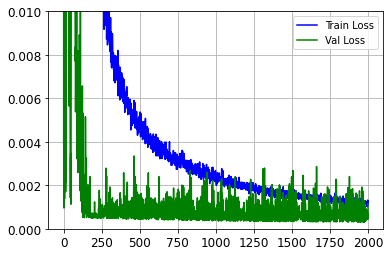

In [30]:
plt.plot(History.history['loss'],'b')
plt.plot(History.history['val_loss'],'g')
plt.legend(['Train Loss','Val Loss'])
plt.grid(True)
plt.gca().set_ylim(0, 0.01) # set the vertical range to [0-1] 
plt.show()

In [31]:
from tensorflow.keras.models import load_model
model1 = load_model("RNN_best.h5", compile = True)
predicted_data = model1.predict(X_test)
predicted_data = scaler.inverse_transform(predicted_data)

from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(test, predicted_data)
RMSE = np.sqrt(MSE)
print(RMSE)

10.633285057681332


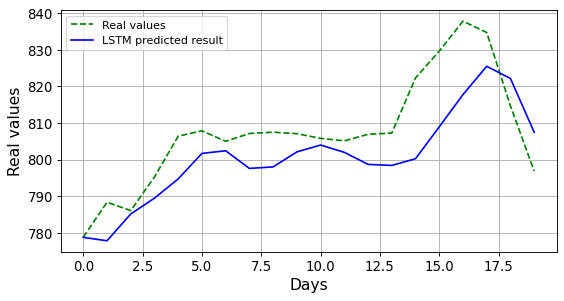

In [44]:
plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test,color="green", linestyle='dashed',label="Real values")
plt.plot(predicted_data,color="blue", label="LSTM predicted result")
#plt.plot(predicted_data,color="red",label="RNN predicted result") # ben ekledim
plt.legend()
plt.xlabel("Days")
plt.ylabel("Real values")
plt.grid(True)
plt.savefig("RNN_Predictions", dpi=300,  bbox_inches='tight')
plt.show()


In [34]:
model = Sequential()
model.add(LSTM(units = 80,return_sequences = True,input_shape = (X_train.shape[1],1)))
model.add(Dropout(0.1))

model.add(LSTM(units = 80,return_sequences = True))
model.add(Dropout(0.1))

model.add(LSTM(units = 80,return_sequences = True))
model.add(Dropout(0.1))

# model.add(LSTM(units = 80,return_sequences = True))
# model.add(Dropout(0.3))
# model.add(LSTM(units = 80,return_sequences = True))
# model.add(Dropout(0.2))

# model.add(LSTM(units = 80,return_sequences = True))
# model.add(Dropout(0.5))


# model.add(LSTM(units = 30,return_sequences = True))
# model.add(Dropout(0.2))


model.add(LSTM(units = 80))
model.add(Dropout(0.5))


model.add(Dense(1))


In [36]:
from tensorflow.keras.optimizers import Adam
# opt = Adam(learning_rate=3e-3 , beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=True)
model.compile(loss='mean_squared_error', optimizer="Adam")


In [37]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
es = EarlyStopping(monitor= 'val_loss', mode='min', patience=200)
modelsave = ModelCheckpoint("LSTM_best.h5", monitor= 'val_loss', verbose=1, save_best_only=True,
                             save_weights_only=False, mode='min')


In [38]:
History_LSTM = model.fit(X_train, y_train, epochs=2000,validation_data=(X_valid, y_valid)
                         , batch_size=512,shuffle=False, callbacks=[es,modelsave])

Epoch 1/2000
2/2 [==============================] - ETA: 0s - loss: 0.1961
Epoch 00001: val_loss improved from inf to 0.28265, saving model to LSTM_best.h5
2/2 [==============================] - 1s 435ms/step - loss: 0.1961 - val_loss: 0.2826
Epoch 2/2000
2/2 [==============================] - ETA: 0s - loss: 0.0309
Epoch 00002: val_loss improved from 0.28265 to 0.09456, saving model to LSTM_best.h5
2/2 [==============================] - 0s 56ms/step - loss: 0.0309 - val_loss: 0.0946
Epoch 3/2000
2/2 [==============================] - ETA: 0s - loss: 0.0902
Epoch 00003: val_loss improved from 0.09456 to 0.01769, saving model to LSTM_best.h5
2/2 [==============================] - 0s 55ms/step - loss: 0.0902 - val_loss: 0.0177
Epoch 4/2000
2/2 [==============================] - ETA: 0s - loss: 0.0282
Epoch 00004: val_loss did not improve from 0.01769
2/2 [==============================] - 0s 42ms/step - loss: 0.0282 - val_loss: 0.1860
Epoch 5/2000
2/2 [==============================] - E

Epoch 39/2000
2/2 [==============================] - ETA: 0s - loss: 0.0070
Epoch 00039: val_loss did not improve from 0.00117
2/2 [==============================] - 0s 40ms/step - loss: 0.0070 - val_loss: 0.0021
Epoch 40/2000
2/2 [==============================] - ETA: 0s - loss: 0.0073
Epoch 00040: val_loss did not improve from 0.00117
2/2 [==============================] - 0s 40ms/step - loss: 0.0073 - val_loss: 0.0029
Epoch 41/2000
2/2 [==============================] - ETA: 0s - loss: 0.0068
Epoch 00041: val_loss did not improve from 0.00117
2/2 [==============================] - 0s 40ms/step - loss: 0.0068 - val_loss: 0.0033
Epoch 42/2000
2/2 [==============================] - ETA: 0s - loss: 0.0076
Epoch 00042: val_loss did not improve from 0.00117
2/2 [==============================] - 0s 39ms/step - loss: 0.0076 - val_loss: 0.0027
Epoch 43/2000
2/2 [==============================] - ETA: 0s - loss: 0.0066
Epoch 00043: val_loss did not improve from 0.00117
2/2 [================

Epoch 78/2000
2/2 [==============================] - ETA: 0s - loss: 0.0064
Epoch 00078: val_loss did not improve from 0.00117
2/2 [==============================] - 0s 42ms/step - loss: 0.0064 - val_loss: 0.0027
Epoch 79/2000
2/2 [==============================] - ETA: 0s - loss: 0.0059
Epoch 00079: val_loss did not improve from 0.00117
2/2 [==============================] - 0s 40ms/step - loss: 0.0059 - val_loss: 0.0022
Epoch 80/2000
2/2 [==============================] - ETA: 0s - loss: 0.0056
Epoch 00080: val_loss did not improve from 0.00117
2/2 [==============================] - 0s 39ms/step - loss: 0.0056 - val_loss: 0.0014
Epoch 81/2000
2/2 [==============================] - ETA: 0s - loss: 0.0060
Epoch 00081: val_loss did not improve from 0.00117
2/2 [==============================] - 0s 43ms/step - loss: 0.0060 - val_loss: 0.0016
Epoch 82/2000
2/2 [==============================] - ETA: 0s - loss: 0.0054
Epoch 00082: val_loss did not improve from 0.00117
2/2 [================

Epoch 117/2000
2/2 [==============================] - ETA: 0s - loss: 0.0055
Epoch 00117: val_loss did not improve from 0.00117
2/2 [==============================] - 0s 40ms/step - loss: 0.0055 - val_loss: 0.0030
Epoch 118/2000
2/2 [==============================] - ETA: 0s - loss: 0.0059
Epoch 00118: val_loss did not improve from 0.00117
2/2 [==============================] - 0s 40ms/step - loss: 0.0059 - val_loss: 0.0026
Epoch 119/2000
2/2 [==============================] - ETA: 0s - loss: 0.0054
Epoch 00119: val_loss did not improve from 0.00117
2/2 [==============================] - 0s 40ms/step - loss: 0.0054 - val_loss: 0.0012
Epoch 120/2000
2/2 [==============================] - ETA: 0s - loss: 0.0051
Epoch 00120: val_loss did not improve from 0.00117
2/2 [==============================] - 0s 41ms/step - loss: 0.0051 - val_loss: 0.0021
Epoch 121/2000
2/2 [==============================] - ETA: 0s - loss: 0.0058
Epoch 00121: val_loss did not improve from 0.00117
2/2 [===========

2/2 [==============================] - ETA: 0s - loss: 0.0053
Epoch 00155: val_loss did not improve from 0.00111
2/2 [==============================] - 0s 41ms/step - loss: 0.0053 - val_loss: 0.0025
Epoch 156/2000
2/2 [==============================] - ETA: 0s - loss: 0.0047
Epoch 00156: val_loss did not improve from 0.00111
2/2 [==============================] - 0s 39ms/step - loss: 0.0047 - val_loss: 0.0019
Epoch 157/2000
2/2 [==============================] - ETA: 0s - loss: 0.0050
Epoch 00157: val_loss did not improve from 0.00111
2/2 [==============================] - 0s 42ms/step - loss: 0.0050 - val_loss: 0.0011
Epoch 158/2000
2/2 [==============================] - ETA: 0s - loss: 0.0051
Epoch 00158: val_loss did not improve from 0.00111
2/2 [==============================] - 0s 47ms/step - loss: 0.0051 - val_loss: 0.0021
Epoch 159/2000
2/2 [==============================] - ETA: 0s - loss: 0.0055
Epoch 00159: val_loss did not improve from 0.00111
2/2 [==========================

2/2 [==============================] - ETA: 0s - loss: 0.0050
Epoch 00193: val_loss did not improve from 0.00105
2/2 [==============================] - 0s 40ms/step - loss: 0.0050 - val_loss: 0.0015
Epoch 194/2000
2/2 [==============================] - ETA: 0s - loss: 0.0046
Epoch 00194: val_loss did not improve from 0.00105
2/2 [==============================] - 0s 40ms/step - loss: 0.0046 - val_loss: 0.0021
Epoch 195/2000
2/2 [==============================] - ETA: 0s - loss: 0.0047
Epoch 00195: val_loss did not improve from 0.00105
2/2 [==============================] - 0s 40ms/step - loss: 0.0047 - val_loss: 0.0013
Epoch 196/2000
2/2 [==============================] - ETA: 0s - loss: 0.0051
Epoch 00196: val_loss did not improve from 0.00105
2/2 [==============================] - 0s 41ms/step - loss: 0.0051 - val_loss: 0.0030
Epoch 197/2000
2/2 [==============================] - ETA: 0s - loss: 0.0049
Epoch 00197: val_loss did not improve from 0.00105
2/2 [==========================

2/2 [==============================] - ETA: 0s - loss: 0.0044
Epoch 00231: val_loss did not improve from 0.00101
2/2 [==============================] - 0s 41ms/step - loss: 0.0044 - val_loss: 0.0014
Epoch 232/2000
2/2 [==============================] - ETA: 0s - loss: 0.0042
Epoch 00232: val_loss did not improve from 0.00101
2/2 [==============================] - 0s 40ms/step - loss: 0.0042 - val_loss: 0.0018
Epoch 233/2000
2/2 [==============================] - ETA: 0s - loss: 0.0048
Epoch 00233: val_loss did not improve from 0.00101
2/2 [==============================] - 0s 40ms/step - loss: 0.0048 - val_loss: 0.0014
Epoch 234/2000
2/2 [==============================] - ETA: 0s - loss: 0.0049
Epoch 00234: val_loss did not improve from 0.00101
2/2 [==============================] - 0s 42ms/step - loss: 0.0049 - val_loss: 0.0014
Epoch 235/2000
2/2 [==============================] - ETA: 0s - loss: 0.0046
Epoch 00235: val_loss did not improve from 0.00101
2/2 [==========================

2/2 [==============================] - ETA: 0s - loss: 0.0045
Epoch 00269: val_loss did not improve from 0.00099
2/2 [==============================] - 0s 41ms/step - loss: 0.0045 - val_loss: 0.0019
Epoch 270/2000
2/2 [==============================] - ETA: 0s - loss: 0.0042
Epoch 00270: val_loss did not improve from 0.00099
2/2 [==============================] - 0s 40ms/step - loss: 0.0042 - val_loss: 0.0011
Epoch 271/2000
2/2 [==============================] - ETA: 0s - loss: 0.0043
Epoch 00271: val_loss did not improve from 0.00099
2/2 [==============================] - 0s 41ms/step - loss: 0.0043 - val_loss: 0.0017
Epoch 272/2000
2/2 [==============================] - ETA: 0s - loss: 0.0044
Epoch 00272: val_loss did not improve from 0.00099
2/2 [==============================] - 0s 39ms/step - loss: 0.0044 - val_loss: 0.0023
Epoch 273/2000
2/2 [==============================] - ETA: 0s - loss: 0.0039
Epoch 00273: val_loss did not improve from 0.00099
2/2 [==========================

2/2 [==============================] - ETA: 0s - loss: 0.0044
Epoch 00307: val_loss did not improve from 0.00092
2/2 [==============================] - 0s 40ms/step - loss: 0.0044 - val_loss: 0.0014
Epoch 308/2000
2/2 [==============================] - ETA: 0s - loss: 0.0044
Epoch 00308: val_loss did not improve from 0.00092
2/2 [==============================] - 0s 39ms/step - loss: 0.0044 - val_loss: 0.0012
Epoch 309/2000
2/2 [==============================] - ETA: 0s - loss: 0.0041
Epoch 00309: val_loss did not improve from 0.00092
2/2 [==============================] - 0s 40ms/step - loss: 0.0041 - val_loss: 0.0025
Epoch 310/2000
2/2 [==============================] - ETA: 0s - loss: 0.0043
Epoch 00310: val_loss improved from 0.00092 to 0.00092, saving model to LSTM_best.h5
2/2 [==============================] - 0s 52ms/step - loss: 0.0043 - val_loss: 9.1535e-04
Epoch 311/2000
2/2 [==============================] - ETA: 0s - loss: 0.0046
Epoch 00311: val_loss did not improve from 0

Epoch 345/2000
2/2 [==============================] - ETA: 0s - loss: 0.0043
Epoch 00345: val_loss did not improve from 0.00089
2/2 [==============================] - 0s 42ms/step - loss: 0.0043 - val_loss: 0.0025
Epoch 346/2000
2/2 [==============================] - ETA: 0s - loss: 0.0045
Epoch 00346: val_loss did not improve from 0.00089
2/2 [==============================] - 0s 40ms/step - loss: 0.0045 - val_loss: 0.0026
Epoch 347/2000
2/2 [==============================] - ETA: 0s - loss: 0.0041
Epoch 00347: val_loss did not improve from 0.00089
2/2 [==============================] - 0s 42ms/step - loss: 0.0041 - val_loss: 8.9893e-04
Epoch 348/2000
2/2 [==============================] - ETA: 0s - loss: 0.0041
Epoch 00348: val_loss did not improve from 0.00089
2/2 [==============================] - 0s 41ms/step - loss: 0.0041 - val_loss: 0.0019
Epoch 349/2000
2/2 [==============================] - ETA: 0s - loss: 0.0044
Epoch 00349: val_loss did not improve from 0.00089
2/2 [=======

2/2 [==============================] - ETA: 0s - loss: 0.0038
Epoch 00383: val_loss did not improve from 0.00089
2/2 [==============================] - 0s 40ms/step - loss: 0.0038 - val_loss: 0.0020
Epoch 384/2000
2/2 [==============================] - ETA: 0s - loss: 0.0040
Epoch 00384: val_loss did not improve from 0.00089
2/2 [==============================] - 0s 39ms/step - loss: 0.0040 - val_loss: 0.0014
Epoch 385/2000
2/2 [==============================] - ETA: 0s - loss: 0.0038
Epoch 00385: val_loss did not improve from 0.00089
2/2 [==============================] - 0s 40ms/step - loss: 0.0038 - val_loss: 0.0013
Epoch 386/2000
2/2 [==============================] - ETA: 0s - loss: 0.0035
Epoch 00386: val_loss did not improve from 0.00089
2/2 [==============================] - 0s 40ms/step - loss: 0.0035 - val_loss: 0.0015
Epoch 387/2000
2/2 [==============================] - ETA: 0s - loss: 0.0035
Epoch 00387: val_loss did not improve from 0.00089
2/2 [==========================

Epoch 421/2000
2/2 [==============================] - ETA: 0s - loss: 0.0041
Epoch 00421: val_loss did not improve from 0.00082
2/2 [==============================] - 0s 40ms/step - loss: 0.0041 - val_loss: 0.0015
Epoch 422/2000
2/2 [==============================] - ETA: 0s - loss: 0.0043
Epoch 00422: val_loss improved from 0.00082 to 0.00082, saving model to LSTM_best.h5
2/2 [==============================] - 0s 52ms/step - loss: 0.0043 - val_loss: 8.1869e-04
Epoch 423/2000
2/2 [==============================] - ETA: 0s - loss: 0.0036
Epoch 00423: val_loss did not improve from 0.00082
2/2 [==============================] - 0s 40ms/step - loss: 0.0036 - val_loss: 0.0024
Epoch 424/2000
2/2 [==============================] - ETA: 0s - loss: 0.0040
Epoch 00424: val_loss did not improve from 0.00082
2/2 [==============================] - 0s 40ms/step - loss: 0.0040 - val_loss: 0.0015
Epoch 425/2000
2/2 [==============================] - ETA: 0s - loss: 0.0040
Epoch 00425: val_loss improve

Epoch 459/2000
2/2 [==============================] - ETA: 0s - loss: 0.0036
Epoch 00459: val_loss did not improve from 0.00081
2/2 [==============================] - 0s 41ms/step - loss: 0.0036 - val_loss: 0.0010
Epoch 460/2000
2/2 [==============================] - ETA: 0s - loss: 0.0031
Epoch 00460: val_loss did not improve from 0.00081
2/2 [==============================] - 0s 40ms/step - loss: 0.0031 - val_loss: 0.0011
Epoch 461/2000
2/2 [==============================] - ETA: 0s - loss: 0.0036
Epoch 00461: val_loss did not improve from 0.00081
2/2 [==============================] - 0s 40ms/step - loss: 0.0036 - val_loss: 0.0018
Epoch 462/2000
2/2 [==============================] - ETA: 0s - loss: 0.0032
Epoch 00462: val_loss did not improve from 0.00081
2/2 [==============================] - 0s 41ms/step - loss: 0.0032 - val_loss: 0.0012
Epoch 463/2000
2/2 [==============================] - ETA: 0s - loss: 0.0035
Epoch 00463: val_loss did not improve from 0.00081
2/2 [===========

Epoch 497/2000
2/2 [==============================] - ETA: 0s - loss: 0.0034
Epoch 00497: val_loss did not improve from 0.00075
2/2 [==============================] - 0s 41ms/step - loss: 0.0034 - val_loss: 0.0022
Epoch 498/2000
2/2 [==============================] - ETA: 0s - loss: 0.0035
Epoch 00498: val_loss did not improve from 0.00075
2/2 [==============================] - 0s 40ms/step - loss: 0.0035 - val_loss: 0.0015
Epoch 499/2000
2/2 [==============================] - ETA: 0s - loss: 0.0033
Epoch 00499: val_loss did not improve from 0.00075
2/2 [==============================] - 0s 40ms/step - loss: 0.0033 - val_loss: 9.9415e-04
Epoch 500/2000
2/2 [==============================] - ETA: 0s - loss: 0.0034
Epoch 00500: val_loss did not improve from 0.00075
2/2 [==============================] - 0s 40ms/step - loss: 0.0034 - val_loss: 0.0023
Epoch 501/2000
2/2 [==============================] - ETA: 0s - loss: 0.0037
Epoch 00501: val_loss did not improve from 0.00075
2/2 [=======

2/2 [==============================] - ETA: 0s - loss: 0.0031
Epoch 00535: val_loss did not improve from 0.00075
2/2 [==============================] - 0s 40ms/step - loss: 0.0031 - val_loss: 8.6460e-04
Epoch 536/2000
2/2 [==============================] - ETA: 0s - loss: 0.0030
Epoch 00536: val_loss did not improve from 0.00075
2/2 [==============================] - 0s 43ms/step - loss: 0.0030 - val_loss: 0.0012
Epoch 537/2000
2/2 [==============================] - ETA: 0s - loss: 0.0031
Epoch 00537: val_loss did not improve from 0.00075
2/2 [==============================] - 0s 42ms/step - loss: 0.0031 - val_loss: 0.0012
Epoch 538/2000
2/2 [==============================] - ETA: 0s - loss: 0.0030
Epoch 00538: val_loss did not improve from 0.00075
2/2 [==============================] - 0s 39ms/step - loss: 0.0030 - val_loss: 0.0011
Epoch 539/2000
2/2 [==============================] - ETA: 0s - loss: 0.0031
Epoch 00539: val_loss did not improve from 0.00075
2/2 [======================

Epoch 573/2000
2/2 [==============================] - ETA: 0s - loss: 0.0029
Epoch 00573: val_loss did not improve from 0.00073
2/2 [==============================] - 0s 40ms/step - loss: 0.0029 - val_loss: 8.2877e-04
Epoch 574/2000
2/2 [==============================] - ETA: 0s - loss: 0.0031
Epoch 00574: val_loss improved from 0.00073 to 0.00071, saving model to LSTM_best.h5
2/2 [==============================] - 0s 51ms/step - loss: 0.0031 - val_loss: 7.0878e-04
Epoch 575/2000
2/2 [==============================] - ETA: 0s - loss: 0.0029
Epoch 00575: val_loss did not improve from 0.00071
2/2 [==============================] - 0s 40ms/step - loss: 0.0029 - val_loss: 8.6702e-04
Epoch 576/2000
2/2 [==============================] - ETA: 0s - loss: 0.0029
Epoch 00576: val_loss did not improve from 0.00071
2/2 [==============================] - 0s 39ms/step - loss: 0.0029 - val_loss: 8.5687e-04
Epoch 577/2000
2/2 [==============================] - ETA: 0s - loss: 0.0029
Epoch 00577: val_

Epoch 610/2000
2/2 [==============================] - ETA: 0s - loss: 0.0026
Epoch 00610: val_loss did not improve from 0.00065
2/2 [==============================] - 0s 39ms/step - loss: 0.0026 - val_loss: 0.0010
Epoch 611/2000
2/2 [==============================] - ETA: 0s - loss: 0.0025
Epoch 00611: val_loss did not improve from 0.00065
2/2 [==============================] - 0s 40ms/step - loss: 0.0025 - val_loss: 6.5238e-04
Epoch 612/2000
2/2 [==============================] - ETA: 0s - loss: 0.0027
Epoch 00612: val_loss did not improve from 0.00065
2/2 [==============================] - 0s 39ms/step - loss: 0.0027 - val_loss: 0.0014
Epoch 613/2000
2/2 [==============================] - ETA: 0s - loss: 0.0028
Epoch 00613: val_loss did not improve from 0.00065
2/2 [==============================] - 0s 40ms/step - loss: 0.0028 - val_loss: 0.0012
Epoch 614/2000
2/2 [==============================] - ETA: 0s - loss: 0.0026
Epoch 00614: val_loss did not improve from 0.00065
2/2 [=======

Epoch 648/2000
2/2 [==============================] - ETA: 0s - loss: 0.0026
Epoch 00648: val_loss did not improve from 0.00063
2/2 [==============================] - 0s 40ms/step - loss: 0.0026 - val_loss: 9.5527e-04
Epoch 649/2000
2/2 [==============================] - ETA: 0s - loss: 0.0027
Epoch 00649: val_loss did not improve from 0.00063
2/2 [==============================] - 0s 40ms/step - loss: 0.0027 - val_loss: 6.8822e-04
Epoch 650/2000
2/2 [==============================] - ETA: 0s - loss: 0.0028
Epoch 00650: val_loss did not improve from 0.00063
2/2 [==============================] - 0s 39ms/step - loss: 0.0028 - val_loss: 9.0594e-04
Epoch 651/2000
2/2 [==============================] - ETA: 0s - loss: 0.0026
Epoch 00651: val_loss did not improve from 0.00063
2/2 [==============================] - 0s 41ms/step - loss: 0.0026 - val_loss: 8.9932e-04
Epoch 652/2000
2/2 [==============================] - ETA: 0s - loss: 0.0027
Epoch 00652: val_loss did not improve from 0.00063


2/2 [==============================] - ETA: 0s - loss: 0.0025
Epoch 00685: val_loss improved from 0.00056 to 0.00056, saving model to LSTM_best.h5
2/2 [==============================] - 0s 53ms/step - loss: 0.0025 - val_loss: 5.6264e-04
Epoch 686/2000
2/2 [==============================] - ETA: 0s - loss: 0.0027
Epoch 00686: val_loss did not improve from 0.00056
2/2 [==============================] - 0s 40ms/step - loss: 0.0027 - val_loss: 9.4077e-04
Epoch 687/2000
2/2 [==============================] - ETA: 0s - loss: 0.0026
Epoch 00687: val_loss did not improve from 0.00056
2/2 [==============================] - 0s 41ms/step - loss: 0.0026 - val_loss: 0.0015
Epoch 688/2000
2/2 [==============================] - ETA: 0s - loss: 0.0025
Epoch 00688: val_loss did not improve from 0.00056
2/2 [==============================] - 0s 39ms/step - loss: 0.0025 - val_loss: 5.8190e-04
Epoch 689/2000
2/2 [==============================] - ETA: 0s - loss: 0.0022    
Epoch 00689: val_loss did not im

2/2 [==============================] - ETA: 0s - loss: 0.0023
Epoch 00722: val_loss did not improve from 0.00055
2/2 [==============================] - 0s 40ms/step - loss: 0.0023 - val_loss: 5.5767e-04
Epoch 723/2000
2/2 [==============================] - ETA: 0s - loss: 0.0023
Epoch 00723: val_loss did not improve from 0.00055
2/2 [==============================] - 0s 40ms/step - loss: 0.0023 - val_loss: 0.0011
Epoch 724/2000
2/2 [==============================] - ETA: 0s - loss: 0.0025
Epoch 00724: val_loss did not improve from 0.00055
2/2 [==============================] - 0s 39ms/step - loss: 0.0025 - val_loss: 6.5764e-04
Epoch 725/2000
2/2 [==============================] - ETA: 0s - loss: 0.0025    
Epoch 00725: val_loss improved from 0.00055 to 0.00054, saving model to LSTM_best.h5
2/2 [==============================] - 0s 53ms/step - loss: 0.0025 - val_loss: 5.3878e-04
Epoch 726/2000
2/2 [==============================] - ETA: 0s - loss: 0.0023
Epoch 00726: val_loss did not im

Epoch 759/2000
2/2 [==============================] - ETA: 0s - loss: 0.0021
Epoch 00759: val_loss did not improve from 0.00051
2/2 [==============================] - 0s 42ms/step - loss: 0.0021 - val_loss: 5.9689e-04
Epoch 760/2000
2/2 [==============================] - ETA: 0s - loss: 0.0021
Epoch 00760: val_loss did not improve from 0.00051
2/2 [==============================] - 0s 108ms/step - loss: 0.0021 - val_loss: 9.5904e-04
Epoch 761/2000
2/2 [==============================] - ETA: 0s - loss: 0.0020    
Epoch 00761: val_loss improved from 0.00051 to 0.00051, saving model to LSTM_best.h5
2/2 [==============================] - 0s 53ms/step - loss: 0.0020 - val_loss: 5.0740e-04
Epoch 762/2000
2/2 [==============================] - ETA: 0s - loss: 0.0023
Epoch 00762: val_loss did not improve from 0.00051
2/2 [==============================] - 0s 41ms/step - loss: 0.0023 - val_loss: 5.1790e-04
Epoch 763/2000
2/2 [==============================] - ETA: 0s - loss: 0.0022    
Epoch 00

Epoch 796/2000
2/2 [==============================] - ETA: 0s - loss: 0.0020    
Epoch 00796: val_loss did not improve from 0.00047
2/2 [==============================] - 0s 39ms/step - loss: 0.0020 - val_loss: 0.0010
Epoch 797/2000
2/2 [==============================] - ETA: 0s - loss: 0.0019    
Epoch 00797: val_loss did not improve from 0.00047
2/2 [==============================] - 0s 40ms/step - loss: 0.0019 - val_loss: 7.6401e-04
Epoch 798/2000
2/2 [==============================] - ETA: 0s - loss: 0.0020    
Epoch 00798: val_loss did not improve from 0.00047
2/2 [==============================] - 0s 41ms/step - loss: 0.0020 - val_loss: 8.6823e-04
Epoch 799/2000
2/2 [==============================] - ETA: 0s - loss: 0.0020    
Epoch 00799: val_loss did not improve from 0.00047
2/2 [==============================] - 0s 42ms/step - loss: 0.0020 - val_loss: 0.0011
Epoch 800/2000
2/2 [==============================] - ETA: 0s - loss: 0.0021    
Epoch 00800: val_loss did not improve f

Epoch 833/2000
2/2 [==============================] - ETA: 0s - loss: 0.0019    
Epoch 00833: val_loss did not improve from 0.00041
2/2 [==============================] - 0s 41ms/step - loss: 0.0019 - val_loss: 4.5790e-04
Epoch 834/2000
2/2 [==============================] - ETA: 0s - loss: 0.0020    
Epoch 00834: val_loss did not improve from 0.00041
2/2 [==============================] - 0s 40ms/step - loss: 0.0020 - val_loss: 5.8182e-04
Epoch 835/2000
2/2 [==============================] - ETA: 0s - loss: 0.0019    
Epoch 00835: val_loss did not improve from 0.00041
2/2 [==============================] - 0s 40ms/step - loss: 0.0019 - val_loss: 0.0010
Epoch 836/2000
2/2 [==============================] - ETA: 0s - loss: 0.0020    
Epoch 00836: val_loss did not improve from 0.00041
2/2 [==============================] - 0s 42ms/step - loss: 0.0020 - val_loss: 4.6180e-04
Epoch 837/2000
2/2 [==============================] - ETA: 0s - loss: 0.0018    
Epoch 00837: val_loss did not impro

Epoch 870/2000
2/2 [==============================] - ETA: 0s - loss: 0.0020    
Epoch 00870: val_loss did not improve from 0.00038
2/2 [==============================] - 0s 40ms/step - loss: 0.0020 - val_loss: 4.4816e-04
Epoch 871/2000
2/2 [==============================] - ETA: 0s - loss: 0.0019    
Epoch 00871: val_loss did not improve from 0.00038
2/2 [==============================] - 0s 41ms/step - loss: 0.0019 - val_loss: 9.2713e-04
Epoch 872/2000
2/2 [==============================] - ETA: 0s - loss: 0.0018    
Epoch 00872: val_loss did not improve from 0.00038
2/2 [==============================] - 0s 40ms/step - loss: 0.0018 - val_loss: 0.0012
Epoch 873/2000
2/2 [==============================] - ETA: 0s - loss: 0.0019    
Epoch 00873: val_loss did not improve from 0.00038
2/2 [==============================] - 0s 39ms/step - loss: 0.0019 - val_loss: 7.7109e-04
Epoch 874/2000
2/2 [==============================] - ETA: 0s - loss: 0.0017    
Epoch 00874: val_loss did not impro

Epoch 907/2000
2/2 [==============================] - ETA: 0s - loss: 0.0019    
Epoch 00907: val_loss did not improve from 0.00037
2/2 [==============================] - 0s 41ms/step - loss: 0.0019 - val_loss: 0.0016
Epoch 908/2000
2/2 [==============================] - ETA: 0s - loss: 0.0017    
Epoch 00908: val_loss did not improve from 0.00037
2/2 [==============================] - 0s 40ms/step - loss: 0.0017 - val_loss: 4.3038e-04
Epoch 909/2000
2/2 [==============================] - ETA: 0s - loss: 0.0020    
Epoch 00909: val_loss did not improve from 0.00037
2/2 [==============================] - 0s 40ms/step - loss: 0.0020 - val_loss: 4.8224e-04
Epoch 910/2000
2/2 [==============================] - ETA: 0s - loss: 0.0017    
Epoch 00910: val_loss did not improve from 0.00037
2/2 [==============================] - 0s 39ms/step - loss: 0.0017 - val_loss: 0.0023
Epoch 911/2000
2/2 [==============================] - ETA: 0s - loss: 0.0020    
Epoch 00911: val_loss did not improve f

Epoch 944/2000
2/2 [==============================] - ETA: 0s - loss: 0.0017    
Epoch 00944: val_loss did not improve from 0.00035
2/2 [==============================] - 0s 39ms/step - loss: 0.0017 - val_loss: 3.7996e-04
Epoch 945/2000
2/2 [==============================] - ETA: 0s - loss: 0.0017    
Epoch 00945: val_loss did not improve from 0.00035
2/2 [==============================] - 0s 40ms/step - loss: 0.0017 - val_loss: 6.6122e-04
Epoch 946/2000
2/2 [==============================] - ETA: 0s - loss: 0.0019    
Epoch 00946: val_loss did not improve from 0.00035
2/2 [==============================] - 0s 40ms/step - loss: 0.0019 - val_loss: 6.5232e-04
Epoch 947/2000
2/2 [==============================] - ETA: 0s - loss: 0.0016    
Epoch 00947: val_loss did not improve from 0.00035
2/2 [==============================] - 0s 40ms/step - loss: 0.0016 - val_loss: 3.7751e-04
Epoch 948/2000
2/2 [==============================] - ETA: 0s - loss: 0.0016    
Epoch 00948: val_loss did not i

2/2 [==============================] - ETA: 0s - loss: 0.0016    
Epoch 00980: val_loss did not improve from 0.00033
2/2 [==============================] - 0s 40ms/step - loss: 0.0016 - val_loss: 4.5439e-04
Epoch 981/2000
2/2 [==============================] - ETA: 0s - loss: 0.0014    
Epoch 00981: val_loss improved from 0.00033 to 0.00032, saving model to LSTM_best.h5
2/2 [==============================] - 0s 53ms/step - loss: 0.0014 - val_loss: 3.2221e-04
Epoch 982/2000
2/2 [==============================] - ETA: 0s - loss: 0.0016    
Epoch 00982: val_loss did not improve from 0.00032
2/2 [==============================] - 0s 39ms/step - loss: 0.0016 - val_loss: 4.9565e-04
Epoch 983/2000
2/2 [==============================] - ETA: 0s - loss: 0.0017    
Epoch 00983: val_loss did not improve from 0.00032
2/2 [==============================] - 0s 40ms/step - loss: 0.0017 - val_loss: 6.8382e-04
Epoch 984/2000
2/2 [==============================] - ETA: 0s - loss: 0.0014    
Epoch 00984:

Epoch 1017/2000
2/2 [==============================] - ETA: 0s - loss: 0.0016    
Epoch 01017: val_loss did not improve from 0.00032
2/2 [==============================] - 0s 40ms/step - loss: 0.0016 - val_loss: 0.0017
Epoch 1018/2000
2/2 [==============================] - ETA: 0s - loss: 0.0016    
Epoch 01018: val_loss did not improve from 0.00032
2/2 [==============================] - 0s 39ms/step - loss: 0.0016 - val_loss: 3.5297e-04
Epoch 1019/2000
2/2 [==============================] - ETA: 0s - loss: 0.0016    
Epoch 01019: val_loss improved from 0.00032 to 0.00031, saving model to LSTM_best.h5
2/2 [==============================] - 0s 53ms/step - loss: 0.0016 - val_loss: 3.0883e-04
Epoch 1020/2000
2/2 [==============================] - ETA: 0s - loss: 0.0014    
Epoch 01020: val_loss did not improve from 0.00031
2/2 [==============================] - 0s 39ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 1021/2000
2/2 [==============================] - ETA: 0s - loss: 0.0018    


Epoch 1054/2000
2/2 [==============================] - ETA: 0s - loss: 0.0013    
Epoch 01054: val_loss did not improve from 0.00031
2/2 [==============================] - 0s 40ms/step - loss: 0.0013 - val_loss: 4.6792e-04
Epoch 1055/2000
2/2 [==============================] - ETA: 0s - loss: 0.0015    
Epoch 01055: val_loss did not improve from 0.00031
2/2 [==============================] - 0s 43ms/step - loss: 0.0015 - val_loss: 4.7605e-04
Epoch 1056/2000
2/2 [==============================] - ETA: 0s - loss: 0.0015    
Epoch 01056: val_loss did not improve from 0.00031
2/2 [==============================] - 0s 40ms/step - loss: 0.0015 - val_loss: 9.8777e-04
Epoch 1057/2000
2/2 [==============================] - ETA: 0s - loss: 0.0015    
Epoch 01057: val_loss did not improve from 0.00031
2/2 [==============================] - 0s 41ms/step - loss: 0.0015 - val_loss: 3.9695e-04
Epoch 1058/2000
2/2 [==============================] - ETA: 0s - loss: 0.0014    
Epoch 01058: val_loss impr

Epoch 1091/2000
2/2 [==============================] - ETA: 0s - loss: 0.0015    
Epoch 01091: val_loss did not improve from 0.00031
2/2 [==============================] - 0s 40ms/step - loss: 0.0015 - val_loss: 8.7317e-04
Epoch 1092/2000
2/2 [==============================] - ETA: 0s - loss: 0.0014    
Epoch 01092: val_loss did not improve from 0.00031
2/2 [==============================] - 0s 40ms/step - loss: 0.0014 - val_loss: 4.0560e-04
Epoch 1093/2000
2/2 [==============================] - ETA: 0s - loss: 0.0014    
Epoch 01093: val_loss did not improve from 0.00031
2/2 [==============================] - 0s 43ms/step - loss: 0.0014 - val_loss: 3.9489e-04
Epoch 1094/2000
2/2 [==============================] - ETA: 0s - loss: 0.0014    
Epoch 01094: val_loss did not improve from 0.00031
2/2 [==============================] - 0s 40ms/step - loss: 0.0014 - val_loss: 9.1580e-04
Epoch 1095/2000
2/2 [==============================] - ETA: 0s - loss: 0.0012    
Epoch 01095: val_loss did 

Epoch 1128/2000
2/2 [==============================] - ETA: 0s - loss: 0.0013    
Epoch 01128: val_loss did not improve from 0.00030
2/2 [==============================] - 0s 40ms/step - loss: 0.0013 - val_loss: 3.0625e-04
Epoch 1129/2000
2/2 [==============================] - ETA: 0s - loss: 7.8092e-0 - ETA: 0s - loss: 0.0013    
Epoch 01129: val_loss did not improve from 0.00030
2/2 [==============================] - 0s 42ms/step - loss: 0.0013 - val_loss: 3.6671e-04
Epoch 1130/2000
2/2 [==============================] - ETA: 0s - loss: 0.0014    
Epoch 01130: val_loss did not improve from 0.00030
2/2 [==============================] - 0s 39ms/step - loss: 0.0014 - val_loss: 3.1144e-04
Epoch 1131/2000
2/2 [==============================] - ETA: 0s - loss: 0.0015    
Epoch 01131: val_loss did not improve from 0.00030
2/2 [==============================] - 0s 43ms/step - loss: 0.0015 - val_loss: 3.7442e-04
Epoch 1132/2000
2/2 [==============================] - ETA: 0s - loss: 0.0014   

Epoch 1165/2000
2/2 [==============================] - ETA: 0s - loss: 0.0013    
Epoch 01165: val_loss did not improve from 0.00030
2/2 [==============================] - 0s 40ms/step - loss: 0.0013 - val_loss: 3.4551e-04
Epoch 1166/2000
2/2 [==============================] - ETA: 0s - loss: 0.0013    
Epoch 01166: val_loss did not improve from 0.00030
2/2 [==============================] - 0s 41ms/step - loss: 0.0013 - val_loss: 3.5446e-04
Epoch 1167/2000
2/2 [==============================] - ETA: 0s - loss: 0.0015    
Epoch 01167: val_loss did not improve from 0.00030
2/2 [==============================] - 0s 40ms/step - loss: 0.0015 - val_loss: 3.0878e-04
Epoch 1168/2000
2/2 [==============================] - ETA: 0s - loss: 0.0013    
Epoch 01168: val_loss did not improve from 0.00030
2/2 [==============================] - 0s 41ms/step - loss: 0.0013 - val_loss: 4.0986e-04
Epoch 1169/2000
2/2 [==============================] - ETA: 0s - loss: 0.0013    
Epoch 01169: val_loss did 

Epoch 1202/2000
2/2 [==============================] - ETA: 0s - loss: 0.0012    
Epoch 01202: val_loss did not improve from 0.00030
2/2 [==============================] - 0s 40ms/step - loss: 0.0012 - val_loss: 6.5020e-04
Epoch 1203/2000
2/2 [==============================] - ETA: 0s - loss: 0.0013    
Epoch 01203: val_loss did not improve from 0.00030
2/2 [==============================] - 0s 41ms/step - loss: 0.0013 - val_loss: 9.3768e-04
Epoch 1204/2000
2/2 [==============================] - ETA: 0s - loss: 0.0014    
Epoch 01204: val_loss did not improve from 0.00030
2/2 [==============================] - 0s 39ms/step - loss: 0.0014 - val_loss: 3.6568e-04
Epoch 1205/2000
2/2 [==============================] - ETA: 0s - loss: 0.0013    
Epoch 01205: val_loss did not improve from 0.00030
2/2 [==============================] - 0s 40ms/step - loss: 0.0013 - val_loss: 5.5143e-04
Epoch 1206/2000
2/2 [==============================] - ETA: 0s - loss: 0.0013    
Epoch 01206: val_loss did 

Epoch 1239/2000
2/2 [==============================] - ETA: 0s - loss: 0.0012    
Epoch 01239: val_loss did not improve from 0.00030
2/2 [==============================] - 0s 41ms/step - loss: 0.0012 - val_loss: 3.5047e-04
Epoch 1240/2000
2/2 [==============================] - ETA: 0s - loss: 0.0012    
Epoch 01240: val_loss did not improve from 0.00030
2/2 [==============================] - 0s 40ms/step - loss: 0.0012 - val_loss: 3.1194e-04
Epoch 1241/2000
2/2 [==============================] - ETA: 0s - loss: 0.0013    
Epoch 01241: val_loss did not improve from 0.00030
2/2 [==============================] - 0s 43ms/step - loss: 0.0013 - val_loss: 6.7358e-04
Epoch 1242/2000
2/2 [==============================] - ETA: 0s - loss: 0.0013    
Epoch 01242: val_loss did not improve from 0.00030
2/2 [==============================] - 0s 43ms/step - loss: 0.0013 - val_loss: 3.2072e-04
Epoch 1243/2000
2/2 [==============================] - ETA: 0s - loss: 0.0014    
Epoch 01243: val_loss did 

Epoch 1276/2000
2/2 [==============================] - ETA: 0s - loss: 0.0013    
Epoch 01276: val_loss did not improve from 0.00030
2/2 [==============================] - 0s 41ms/step - loss: 0.0013 - val_loss: 4.6828e-04
Epoch 1277/2000
2/2 [==============================] - ETA: 0s - loss: 0.0012    
Epoch 01277: val_loss did not improve from 0.00030
2/2 [==============================] - 0s 40ms/step - loss: 0.0012 - val_loss: 4.1037e-04
Epoch 1278/2000
2/2 [==============================] - ETA: 0s - loss: 0.0013    
Epoch 01278: val_loss did not improve from 0.00030
2/2 [==============================] - 0s 43ms/step - loss: 0.0013 - val_loss: 4.7612e-04
Epoch 1279/2000
2/2 [==============================] - ETA: 0s - loss: 0.0012    
Epoch 01279: val_loss did not improve from 0.00030
2/2 [==============================] - 0s 40ms/step - loss: 0.0012 - val_loss: 4.7948e-04
Epoch 1280/2000
2/2 [==============================] - ETA: 0s - loss: 0.0012    
Epoch 01280: val_loss did 

Epoch 1313/2000
2/2 [==============================] - ETA: 0s - loss: 0.0013    
Epoch 01313: val_loss did not improve from 0.00030
2/2 [==============================] - 0s 42ms/step - loss: 0.0013 - val_loss: 6.2851e-04
Epoch 1314/2000
2/2 [==============================] - ETA: 0s - loss: 0.0012    
Epoch 01314: val_loss did not improve from 0.00030
2/2 [==============================] - 0s 39ms/step - loss: 0.0012 - val_loss: 4.7197e-04
Epoch 1315/2000
2/2 [==============================] - ETA: 0s - loss: 0.0011    
Epoch 01315: val_loss did not improve from 0.00030
2/2 [==============================] - 0s 41ms/step - loss: 0.0011 - val_loss: 3.8740e-04
Epoch 1316/2000
2/2 [==============================] - ETA: 0s - loss: 0.0011    
Epoch 01316: val_loss did not improve from 0.00030
2/2 [==============================] - 0s 41ms/step - loss: 0.0011 - val_loss: 4.9380e-04
Epoch 1317/2000
2/2 [==============================] - ETA: 0s - loss: 0.0011    
Epoch 01317: val_loss did 

Epoch 1350/2000
2/2 [==============================] - ETA: 0s - loss: 0.0011    
Epoch 01350: val_loss did not improve from 0.00030
2/2 [==============================] - 0s 39ms/step - loss: 0.0011 - val_loss: 3.6100e-04
Epoch 1351/2000
2/2 [==============================] - ETA: 0s - loss: 0.0014    
Epoch 01351: val_loss did not improve from 0.00030
2/2 [==============================] - 0s 40ms/step - loss: 0.0014 - val_loss: 6.2969e-04
Epoch 1352/2000
2/2 [==============================] - ETA: 0s - loss: 0.0012    
Epoch 01352: val_loss did not improve from 0.00030
2/2 [==============================] - 0s 43ms/step - loss: 0.0012 - val_loss: 3.2831e-04
Epoch 1353/2000
2/2 [==============================] - ETA: 0s - loss: 0.0013    
Epoch 01353: val_loss did not improve from 0.00030
2/2 [==============================] - 0s 41ms/step - loss: 0.0013 - val_loss: 3.5090e-04
Epoch 1354/2000
2/2 [==============================] - ETA: 0s - loss: 0.0013    
Epoch 01354: val_loss did 

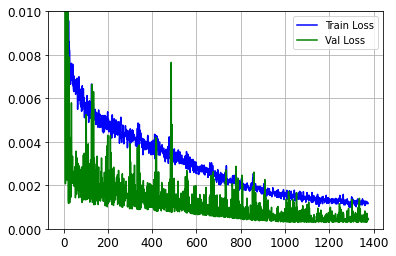

In [39]:
#plt.plot(History_LSTM.history['accuracy'],color='orange')
#plt.plot(History_LSTM.history['val_accuracy'],'r')
plt.plot(History_LSTM.history['loss'],'b')
plt.plot(History_LSTM.history['val_loss'],'g')
plt.legend(['Train Loss','Val Loss'])
plt.grid(True)
plt.gca().set_ylim(0, 0.01) # set the vertical range to [0-1] 
plt.show()

In [40]:
from tensorflow.keras.models import load_model
model1 = load_model("LSTM_best.h5", compile = True)

In [41]:
predicted_data2=model1.predict(X_test)
predicted_data2=scaler.inverse_transform(predicted_data2)

In [42]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(test, predicted_data2)
RMSE = np.sqrt(MSE)
print(RMSE)

7.633916531025114


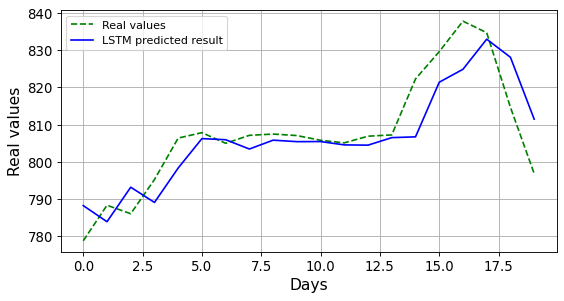

In [45]:
plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test,color="green", linestyle='dashed',label="Real values")
plt.plot(predicted_data2,color="blue", label="LSTM predicted result")
#plt.plot(predicted_data,color="red",label="RNN predicted result") # ben ekledim
plt.legend()
plt.xlabel("Days")
plt.ylabel("Real values")
plt.grid(True)
plt.savefig("LSTM_Predictions", dpi=300,  bbox_inches='tight')
plt.show()
